In [10]:
import pandas as pd
import numpy as np

In [79]:
###########################################################################
#
# 取一開始的資料集合
#
###########################################################################

In [11]:
DataSet = pd.read_csv(r"C:\Users\William\Desktop\20230417_DataSet.csv")
DataSet

,Unnamed: 0,ECU Absolute Time,Atmospheric Pressure,Inclination Switch,Fault Code Count,Ignition Coil Current Diagnosis,Fault Light Mileage,Engine Operating Time,Ignition Advance Angle,Idling Correction Ignition Angle,...,X-axis Angular Velocity,Y-axis Angular Velocity,Z-axis Angular Velocity,X-axis Acceleration,Y-axis Acceleration,Z-axis Acceleration,X-axis Angle,Y-axis Angle,Z-axis Angle,Unnamed: 60
0,0,2023-04-17 14:16:18.681271040+08:00,1007,0.77705,0,0.092773,0,855.666663,11.718314,-0.000314,...,-0.21332,-0.92759,0.18360,-3.58173,-0.35434,9.06445,-2.08212,84.48410,50.20447,Idle 1
1,1,2023-04-17 14:16:18.681271040+08:00,1007,0.77705,0,0.092773,0,855.666663,11.718314,-0.000314,...,0.03147,1.20911,-0.12152,-2.18591,-1.56819,8.33900,-10.30989,54.93496,49.55692,Idle 1
2,2,2023-04-17 14:16:18.681271040+08:00,1007,0.77705,0,0.092773,0,855.666663,11.718314,-0.000314,...,0.82443,2.73470,0.06207,-3.25133,2.03268,11.35091,9.76793,121.42985,61.51820,Idle 1
3,3,2023-04-17 14:16:18.681271040+08:00,1007,0.77705,0,0.092773,0,855.666663,11.718314,-0.000314,...,-1.25020,-2.51438,0.00087,-2.63124,-0.68953,8.34380,-4.50638,75.56187,50.93601,Idle 1
4,4,2023-04-17 14:16:18.681271040+08:00,1007,0.77705,0,0.092773,0,855.666663,11.718314,-0.000314,...,0.88563,-0.13376,-0.06032,-3.53384,0.14366,8.20732,0.92107,92.26421,51.25025,Idle 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27572,27572,2023-04-17 14:41:25.106148096+08:00,1006,0.77705,0,0.092773,0,856.083330,11.249569,-0.000314,...,-0.82356,-0.86640,-0.24305,-4.22098,-0.17477,8.39647,-1.06543,87.71396,41.29279,NaN
27573,27573,2023-04-17 14:41:25.106148096+08:00,1006,0.77705,0,0.092773,0,856.083330,11.249569,-0.000314,...,2.28970,1.02639,-0.30424,-5.20021,0.18675,10.23282,0.93211,91.98168,42.22319,NaN
27574,27574,2023-04-17 14:41:25.106148096+08:00,1006,0.77705,0,0.092773,0,856.083330,11.249569,-0.000314,...,-2.28795,1.08671,-0.36544,-2.86108,0.24901,9.23204,1.47580,94.89882,47.16166,NaN
27575,27575,2023-04-17 14:41:25.106148096+08:00,1006,0.77705,0,0.092773,0,856.083330,11.249569,-0.000314,...,4.36433,1.20911,-0.24305,-4.08691,0.49561,9.19374,2.82005,96.71088,44.66560,NaN


In [ ]:
###########################################################################
#
# 角度最校正
#
###########################################################################

In [82]:
#讀檔案
Reverse_Axis_Data = pd.read_csv(r"C:\Users\William\Desktop\20230417_DataSet.csv")

# 定義原始角度矩陣
angles = np.array([Reverse_Axis_Data['X-axis Angle'].iloc[0], Reverse_Axis_Data["Y-axis Angle"].iloc[0], Reverse_Axis_Data['Z-axis Angle'].iloc[0]])   # 第一筆的3軸資料

# 將角度轉換為弧度
angles = np.radians(angles)

# 定義旋轉矩陣
rotation_x = np.array([[1, 0, 0],
                       [0, np.cos(angles[0]), -np.sin(angles[0])],
                       [0, np.sin(angles[0]), np.cos(angles[0])]])

rotation_y = np.array([[np.cos(angles[1]), 0, np.sin(angles[1])],
                       [0, 1, 0],
                       [-np.sin(angles[1]), 0, np.cos(angles[1])]])

rotation_z = np.array([[np.cos(angles[2]), -np.sin(angles[2]), 0],
                       [np.sin(angles[2]), np.cos(angles[2]), 0],
                       [0, 0, 1]])

rotation_matrix = np.dot(rotation_z, np.dot(rotation_y, rotation_x))

# 計算逆矩陣
inv_rotation_matrix = np.linalg.inv(rotation_matrix)


Reverse_Axis_Data_finish = Reverse_Axis_Data.copy()
for row in range (len(Reverse_Axis_Data)):
    # 假設我們有一個三軸角度的資料集
    x_angle = Reverse_Axis_Data["X-axis Angle"].iloc[row]  # X軸角度
    y_angle = Reverse_Axis_Data["Y-axis Angle"].iloc[row]  # Y軸角度
    z_angle = Reverse_Axis_Data["Z-axis Angle"].iloc[row]  # Z軸角度

    # 將角度轉換為弧度
    x_rad = np.radians(x_angle)
    y_rad = np.radians(y_angle)
    z_rad = np.radians(z_angle)

    # 原始角度資料
    angles = np.array([x_rad, y_rad, z_rad])

    # 將原始角度矩陣乘以逆矩陣
    new_angles = np.dot(inv_rotation_matrix, angles)

    # 將新的角度矩陣轉換為度數
    new_angles = np.degrees(new_angles)

    # 輸出歸零後的角度資料
    Reverse_Axis_Data_finish["X-axis Angle"].iloc[row] = new_angles[0]
    Reverse_Axis_Data_finish["Y-axis Angle"].iloc[row] = new_angles[1]
    Reverse_Axis_Data_finish["Z-axis Angle"].iloc[row] = new_angles[2]

    
Reverse_Axis_Data_finish = Reverse_Axis_Data_finish.drop('Unnamed: 0',axis=1)
Reverse_Axis_Data_finish.to_csv(r"C:\Users\William\Desktop\20230417_DataSet_Rotation.csv")

Reverse_Axis_Data_finish

C:\Users\William\AppData\Local\Temp\ipykernel_18260\4093462124.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Reverse_Axis_Data_finish["X-axis Angle"].iloc[row] = new_angles[0]
C:\Users\William\AppData\Local\Temp\ipykernel_18260\4093462124.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Reverse_Axis_Data_finish["Y-axis Angle"].iloc[row] = new_angles[1]
C:\Users\William\AppData\Local\Temp\ipykernel_18260\4093462124.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/inde

,ECU Absolute Time,Atmospheric Pressure,Inclination Switch,Fault Code Count,Ignition Coil Current Diagnosis,Fault Light Mileage,Engine Operating Time,Ignition Advance Angle,Idling Correction Ignition Angle,Fuel Injection Prohibition Mode,...,X-axis Angular Velocity,Y-axis Angular Velocity,Z-axis Angular Velocity,X-axis Acceleration,Y-axis Acceleration,Z-axis Acceleration,X-axis Angle,Y-axis Angle,Z-axis Angle,Action
0,2023-04-17 14:16:18.681271040+08:00,1007,0.77705,0,0.092773,0,855.666663,11.718314,-0.000314,0,...,-0.21332,-0.92759,0.18360,-3.58173,-0.35434,9.06445,-43.860633,53.162447,70.088417,Idle 1
1,2023-04-17 14:16:18.681271040+08:00,1007,0.77705,0,0.092773,0,855.666663,11.718314,-0.000314,0,...,0.03147,1.20911,-0.12152,-2.18591,-1.56819,8.33900,-45.904592,41.593261,41.746869,Idle 1
2,2023-04-17 14:16:18.681271040+08:00,1007,0.77705,0,0.092773,0,855.666663,11.718314,-0.000314,0,...,0.82443,2.73470,0.06207,-3.25133,2.03268,11.35091,-51.664345,66.354812,107.484623,Idle 1
3,2023-04-17 14:16:18.681271040+08:00,1007,0.77705,0,0.092773,0,855.666663,11.718314,-0.000314,0,...,-1.25020,-2.51438,0.00087,-2.63124,-0.68953,8.34380,-45.396873,49.618426,61.656439,Idle 1
4,2023-04-17 14:16:18.681271040+08:00,1007,0.77705,0,0.092773,0,855.666663,11.718314,-0.000314,0,...,0.88563,-0.13376,-0.06032,-3.53384,0.14366,8.20732,-44.142216,55.543548,78.144098,Idle 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27572,2023-04-17 14:41:25.106148096+08:00,1006,0.77705,0,0.092773,0,856.083330,11.249569,-0.000314,0,...,-0.82356,-0.86640,-0.24305,-4.22098,-0.17477,8.39647,-34.689131,54.365558,72.394881,NaN
27573,2023-04-17 14:41:25.106148096+08:00,1006,0.77705,0,0.092773,0,856.083330,11.249569,-0.000314,0,...,2.28970,1.02639,-0.30424,-5.20021,0.18675,10.23282,-35.177142,55.393477,77.061193,NaN
27574,2023-04-17 14:41:25.106148096+08:00,1006,0.77705,0,0.092773,0,856.083330,11.249569,-0.000314,0,...,-2.28795,1.08671,-0.36544,-2.86108,0.24901,9.23204,-39.843853,56.731014,80.163867,NaN
27575,2023-04-17 14:41:25.106148096+08:00,1006,0.77705,0,0.092773,0,856.083330,11.249569,-0.000314,0,...,4.36433,1.20911,-0.24305,-4.08691,0.49561,9.19374,-37.142822,56.785159,82.169455,NaN


In [ ]:
###########################################################################
#
# 角速度與加速度校正
#
###########################################################################

In [90]:
Reverse_Axis_Data = pd.read_csv(r"C:\Users\William\Desktop\20230417_DataSet_Rotation.csv")

columns_to_calibrate = ['X-axis Angular Velocity', 'Y-axis Angular Velocity', 'Z-axis Angular Velocity',
                        'X-axis Acceleration', 'Y-axis Acceleration', 'Z-axis Acceleration']

# 計算平均
average_values = Reverse_Axis_Data[columns_to_calibrate][:1270].mean()

# 校正資料集
Reverse_Axis_Data[columns_to_calibrate] = Reverse_Axis_Data[columns_to_calibrate] - average_values
Reverse_Axis_Data = Reverse_Axis_Data.drop('Unnamed: 0' ,axis=1)
Reverse_Axis_Data.to_csv(r"C:\Users\William\Desktop\20230417_DataSet_Rotation_submean.csv")
Reverse_Axis_Data

,ECU Absolute Time,Atmospheric Pressure,Inclination Switch,Fault Code Count,Ignition Coil Current Diagnosis,Fault Light Mileage,Engine Operating Time,Ignition Advance Angle,Idling Correction Ignition Angle,Fuel Injection Prohibition Mode,...,X-axis Angular Velocity,Y-axis Angular Velocity,Z-axis Angular Velocity,X-axis Acceleration,Y-axis Acceleration,Z-axis Acceleration,X-axis Angle,Y-axis Angle,Z-axis Angle,Action
0,2023-04-17 14:16:18.681271040+08:00,1007,0.77705,0,0.092773,0,855.666663,11.718314,-0.000314,0,...,-0.118882,-0.83397,0.087026,-0.92838,0.172703,-0.438973,-43.860633,53.162447,70.088417,Idle 1
1,2023-04-17 14:16:18.681271040+08:00,1007,0.77705,0,0.092773,0,855.666663,11.718314,-0.000314,0,...,0.125908,1.30273,-0.218094,0.46744,-1.041147,-1.164423,-45.904592,41.593261,41.746869,Idle 1
2,2023-04-17 14:16:18.681271040+08:00,1007,0.77705,0,0.092773,0,855.666663,11.718314,-0.000314,0,...,0.918868,2.82832,-0.034504,-0.59798,2.559723,1.847487,-51.664345,66.354812,107.484623,Idle 1
3,2023-04-17 14:16:18.681271040+08:00,1007,0.77705,0,0.092773,0,855.666663,11.718314,-0.000314,0,...,-1.155762,-2.42076,-0.095704,0.02211,-0.162487,-1.159623,-45.396873,49.618426,61.656439,Idle 1
4,2023-04-17 14:16:18.681271040+08:00,1007,0.77705,0,0.092773,0,855.666663,11.718314,-0.000314,0,...,0.980068,-0.04014,-0.156894,-0.88049,0.670703,-1.296103,-44.142216,55.543548,78.144098,Idle 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27572,2023-04-17 14:41:25.106148096+08:00,1006,0.77705,0,0.092773,0,856.083330,11.249569,-0.000314,0,...,-0.729122,-0.77278,-0.339624,-1.56763,0.352273,-1.106953,-34.689131,54.365558,72.394881,NaN
27573,2023-04-17 14:41:25.106148096+08:00,1006,0.77705,0,0.092773,0,856.083330,11.249569,-0.000314,0,...,2.384138,1.12001,-0.400814,-2.54686,0.713793,0.729397,-35.177142,55.393477,77.061193,NaN
27574,2023-04-17 14:41:25.106148096+08:00,1006,0.77705,0,0.092773,0,856.083330,11.249569,-0.000314,0,...,-2.193512,1.18033,-0.462014,-0.20773,0.776053,-0.271383,-39.843853,56.731014,80.163867,NaN
27575,2023-04-17 14:41:25.106148096+08:00,1006,0.77705,0,0.092773,0,856.083330,11.249569,-0.000314,0,...,4.458768,1.30273,-0.339624,-1.43356,1.022653,-0.309683,-37.142822,56.785159,82.169455,NaN


In [ ]:
###########################################################################
#
# 正規化
#
###########################################################################

In [91]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

Data_Set = pd.read_csv(r"C:\Users\William\Desktop\20230417_DataSet_Rotation_submean.csv")

Normalization_Feature = ['X-axis Angular Velocity', 'Y-axis Angular Velocity', 'Z-axis Angular Velocity',
                         'X-axis Acceleration', 'Y-axis Acceleration', 'Z-axis Acceleration',
                         'X-axis Angle', 'Y-axis Angle', 'Z-axis Angle']

# 创建MinMaxScaler对象
scaler = MinMaxScaler()

# 对指定特征进行最小-最大标准化
Data_Set[Normalization_Feature] = scaler.fit_transform(Data_Set[Normalization_Feature])
Data_Set = Data_Set.drop('Unnamed: 0',axis=1)
Data_Set.to_csv(r"C:\Users\William\Desktop\20230523_DataSet_Rotation_submean_Normaliation.csv")

# DataSet = Data_Set
Data_Set

,ECU Absolute Time,Atmospheric Pressure,Inclination Switch,Fault Code Count,Ignition Coil Current Diagnosis,Fault Light Mileage,Engine Operating Time,Ignition Advance Angle,Idling Correction Ignition Angle,Fuel Injection Prohibition Mode,...,X-axis Angular Velocity,Y-axis Angular Velocity,Z-axis Angular Velocity,X-axis Acceleration,Y-axis Acceleration,Z-axis Acceleration,X-axis Angle,Y-axis Angle,Z-axis Angle,Action
0,2023-04-17 14:16:18.681271040+08:00,1007,0.77705,0,0.092773,0,855.666663,11.718314,-0.000314,0,...,0.585974,0.558023,0.424284,0.418915,0.500327,0.587392,0.857438,0.805220,0.611079,Idle 1
1,2023-04-17 14:16:18.681271040+08:00,1007,0.77705,0,0.092773,0,855.666663,11.718314,-0.000314,0,...,0.590232,0.568828,0.421940,0.471179,0.463425,0.577468,0.851799,0.763018,0.526173,Idle 1
2,2023-04-17 14:16:18.681271040+08:00,1007,0.77705,0,0.092773,0,855.666663,11.718314,-0.000314,0,...,0.604023,0.576542,0.423351,0.431287,0.572894,0.618667,0.835907,0.853343,0.723110,Idle 1
3,2023-04-17 14:16:18.681271040+08:00,1007,0.77705,0,0.092773,0,855.666663,11.718314,-0.000314,0,...,0.567940,0.549999,0.422881,0.454505,0.490137,0.577534,0.853200,0.792292,0.585818,Idle 1
4,2023-04-17 14:16:18.681271040+08:00,1007,0.77705,0,0.092773,0,855.666663,11.718314,-0.000314,0,...,0.605088,0.562037,0.422411,0.420709,0.515467,0.575667,0.856662,0.813906,0.635212,Idle 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27572,2023-04-17 14:41:25.106148096+08:00,1006,0.77705,0,0.092773,0,856.083330,11.249569,-0.000314,0,...,0.575360,0.558332,0.421007,0.394980,0.505786,0.578255,0.882744,0.809609,0.617989,NaN
27573,2023-04-17 14:41:25.106148096+08:00,1006,0.77705,0,0.092773,0,856.083330,11.249569,-0.000314,0,...,0.629508,0.567904,0.420537,0.358315,0.516777,0.603373,0.881398,0.813358,0.631968,NaN
27574,2023-04-17 14:41:25.106148096+08:00,1006,0.77705,0,0.092773,0,856.083330,11.249569,-0.000314,0,...,0.549890,0.568209,0.420067,0.445899,0.518670,0.589684,0.868521,0.818238,0.641263,NaN
27575,2023-04-17 14:41:25.106148096+08:00,1006,0.77705,0,0.092773,0,856.083330,11.249569,-0.000314,0,...,0.665592,0.568828,0.421007,0.400000,0.526166,0.589160,0.875974,0.818435,0.647271,NaN


In [93]:
Data_Set = pd.read_csv(r"C:\Users\William\Desktop\20230523_DataSet_Rotation_submean_Normaliation.csv")
Data_Set = Data_Set[['X-axis Angular Velocity', 'Y-axis Angular Velocity', 'Z-axis Angular Velocity',
                         'X-axis Acceleration', 'Y-axis Acceleration', 'Z-axis Acceleration',
                         'X-axis Angle', 'Y-axis Angle', 'Z-axis Angle']]

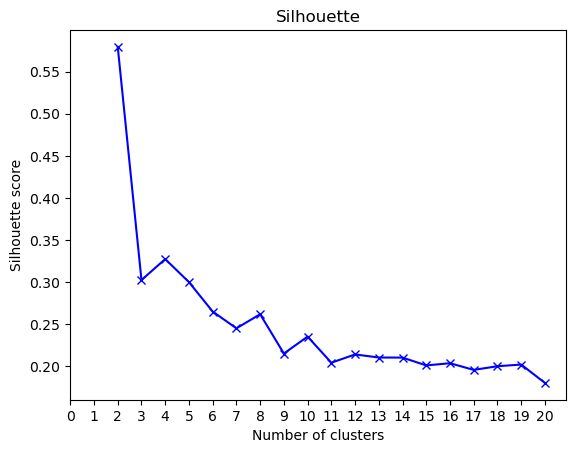

In [94]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt


# 設定K的範圍
K_range = range(2, 21)

# 儲存每個K的silhouette score
silhouette_scores = []

# 計算每個K的silhouette score
for K in K_range:
    # 建立KMeans模型
    model = KMeans(n_clusters=K, random_state=0)
    # 將資料分成K群
    labels = model.fit_predict(Data_Set)
    # 計算silhouette score
    score = silhouette_score(Data_Set, labels)
    # 儲存silhouette score
    silhouette_scores.append(score)

# 畫出K與silhouette score之間的關係圖
plt.plot(K_range, silhouette_scores, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette')
plt.xticks(np.arange(0, 21, 1))
# plt.yticks(np.arange(0, 0.5, 0.05))
plt.savefig('Silhouette score.png')

plt.show()

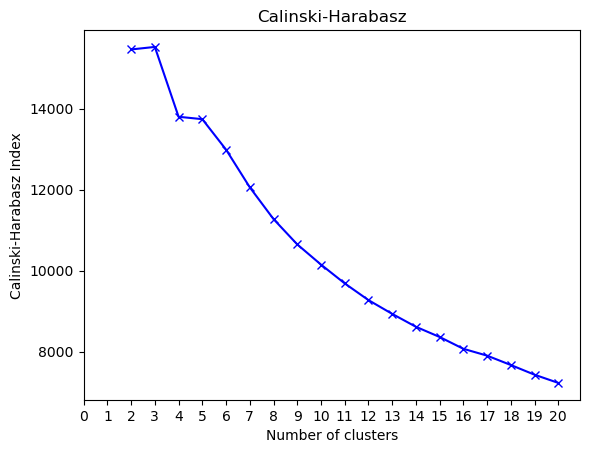

In [95]:
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score
import matplotlib.pyplot as plt

# 儲存每個K的calinski harabasz score
calinski_scores = []

# 設定K的範圍
K_range = range(2, 21)

# 計算每個K的calinski harabasz score
for k in K_range:
    # 建立KMeans模型
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(Data_Set)

    # 計算calinski harabasz score
    score = calinski_harabasz_score(Data_Set, kmeans.labels_)

    # 儲存calinski harabasz score
    calinski_scores.append(score)

# 畫出K與calinski harabasz score之間的關係圖
plt.plot(K_range, calinski_scores, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Calinski-Harabasz Index')
plt.title('Calinski-Harabasz')
plt.xticks(np.arange(0, 21, 1))
# plt.yticks(np.arange(6000, 13000, 1000))

plt.savefig('Calinski-Harabasz Index.png')

plt.show()

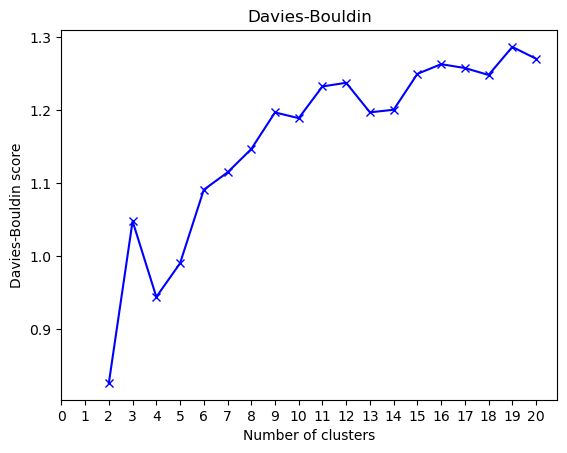

In [96]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt


# 設定K的範圍
K_range = range(2, 21)

# 儲存每個K的davies_bouldin score
davies_bouldin_scores = []

# 計算每個K的davies_bouldin score
for k in K_range:
    # 建立KMeans模型
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(Data_Set)

    # 計算davies_bouldin score
    score = davies_bouldin_score(Data_Set, kmeans.labels_)

    # 儲存davies_bouldin score
    davies_bouldin_scores.append(score)

# 畫出K與davies_bouldin score之間的關係圖
plt.plot(K_range, davies_bouldin_scores, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Davies-Bouldin score')
plt.title('Davies-Bouldin')
plt.xticks(np.arange(0, 21, 1))
# plt.yticks(np.arange(0.9, 1.36, 0.05))

plt.savefig('Davies-Bouldin score.png')
plt.show()

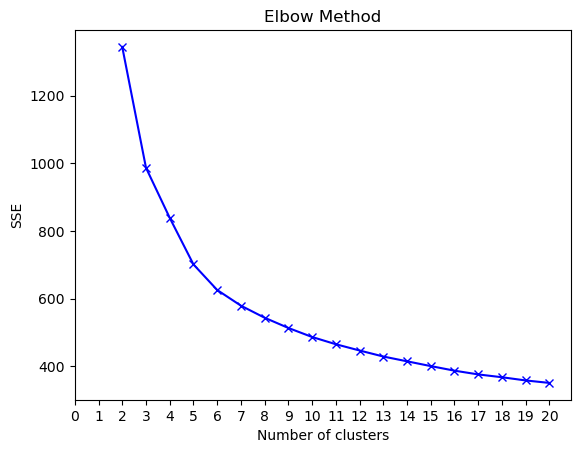

In [97]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 設定K的範圍
K_range = range(2, 21)

# 儲存每個K的inertia
inertias = []

# 計算每個K的inertia
for k in K_range:
    # 建立KMeans模型
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(Data_Set)

    # 儲存inertia
    inertias.append(kmeans.inertia_)

# 畫出K與inertia之間的關係圖
plt.plot(K_range, inertias, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.xticks(np.arange(0, 21, 1))
# plt.yticks(np.arange(0, 1400, 100))

plt.savefig('Elbow Method.png')
plt.show()

In [102]:
#############################
# 讀取檔案 (更改成一秒 6 次)
#############################
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
Data_Set = pd.read_csv(r"C:\Users\William\Desktop\20230523_DataSet_Rotation_submean_Normaliation.csv")
Data_Set = Data_Set.iloc[::5]
Data_Set = Data_Set.drop('Unnamed: 0',axis=1)
Data_Set.to_csv(r"C:\Users\William\Desktop\20230523_DataSet_Rotation_submean_Normaliation_f6.csv")
Data_Set

,ECU Absolute Time,Atmospheric Pressure,Inclination Switch,Fault Code Count,Ignition Coil Current Diagnosis,Fault Light Mileage,Engine Operating Time,Ignition Advance Angle,Idling Correction Ignition Angle,Fuel Injection Prohibition Mode,...,X-axis Angular Velocity,Y-axis Angular Velocity,Z-axis Angular Velocity,X-axis Acceleration,Y-axis Acceleration,Z-axis Acceleration,X-axis Angle,Y-axis Angle,Z-axis Angle,Action
0,2023-04-17 14:16:18.681271040+08:00,1007,0.77705,0,0.092773,0,855.666663,11.718314,-0.000314,0,...,0.585974,0.558023,0.424284,0.418915,0.500327,0.587392,0.857438,0.805220,0.611079,Idle 1
5,2023-04-17 14:16:18.681271040+08:00,1007,0.77705,0,0.092773,0,855.666663,11.718314,-0.000314,0,...,0.565811,0.565432,0.424754,0.448767,0.487881,0.593090,0.851285,0.790531,0.584576,Idle 1
10,2023-04-17 14:16:19.100972032+08:00,1007,0.77705,0,0.097656,0,855.666663,10.780824,-0.937804,0,...,0.557311,0.565432,0.423821,0.471358,0.413567,0.575962,0.857123,0.750001,0.460816,Idle 1
15,2023-04-17 14:16:19.100972032+08:00,1007,0.77705,0,0.097656,0,855.666663,10.780824,-0.937804,0,...,0.576425,0.562966,0.419127,0.429404,0.518742,0.586344,0.851419,0.816661,0.641597,Idle 1
20,2023-04-17 14:16:19.551589888+08:00,1007,0.77705,0,0.097656,0,855.666663,11.718314,-0.000314,0,...,0.548826,0.571295,0.417723,0.428328,0.560885,0.636352,0.839079,0.848424,0.704576,Idle 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27555,2023-04-17 14:41:24.206618112+08:00,1006,0.77705,0,0.092773,0,856.083330,8.437098,-2.812784,0,...,0.567940,0.562037,0.423351,0.416495,0.567727,0.602816,0.865247,0.842228,0.708008,NaN
27560,2023-04-17 14:41:24.206618112+08:00,1006,0.77705,0,0.092773,0,856.083330,8.437098,-2.812784,0,...,0.617830,0.566666,0.421940,0.371941,0.543271,0.589095,0.884636,0.821261,0.664095,NaN
27565,2023-04-17 14:41:24.656843008+08:00,1006,0.77705,0,0.097656,0,856.083330,10.312078,-0.937804,0,...,0.600845,0.559261,0.420537,0.381981,0.520562,0.560766,0.890635,0.813817,0.637228,NaN
27570,2023-04-17 14:41:25.106148096+08:00,1006,0.77705,0,0.092773,0,856.083330,11.249569,-0.000314,0,...,0.613588,0.563271,0.420067,0.399642,0.536138,0.595382,0.872199,0.823272,0.661077,NaN


In [103]:
#############################
# k-mean分群 4
#############################
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

Data_Set = pd.read_csv(r"C:\Users\William\Desktop\20230523_DataSet_Rotation_submean_Normaliation_f6.csv")

Data_Set_Label = Data_Set['Action']
Data_Set = Data_Set[['X-axis Angular Velocity','Y-axis Angular Velocity','Z-axis Angular Velocity','X-axis Acceleration','Y-axis Acceleration','Z-axis Acceleration','X-axis Angle', 'Y-axis Angle', 'Z-axis Angle']]



# 建立 KMeans 模型並進行分群
kmeans = KMeans(n_clusters=4)
kmeans.fit(Data_Set)
labels = kmeans.labels_


Data_Set['Base Action'] = labels
Data_Set['Action'] = Data_Set_Label

Data_Set.to_csv(r'C:\Users\William\Desktop\0523_new_DataSet\20230523_DataSet_Rotation_submean_Normaliation_f6_4cluster.csv')

In [105]:
import vomm

In [106]:
##############################################################################
#
#  4群跑ppm
#  4序列       1 測試
##############################################################################

In [133]:
#  使用資料及檔案位置'C:\Users\William\Desktop\0523_new_DataSet\20230523_DataSet_Rotation_submean_Normaliation_f6_4cluster.csv')

#  輸入序列訓練集與測試集

training_data_Idle = "02200222020222002020200210022022010200002201220221221222120000201002002200221222200220222202020120020002222222221202220010022212201020222120120202212200122021212210210220020202101111222202022202022222220020022202202220022022222202202221" 
training_data_Idle = [int(x) for x in training_data_Idle]
input_string_Idle = "000002200000022222202222000022202222220202022202200000022222022222222112" #
input_string_Idle = [int(x) for x in input_string_Idle]


training_data_Go = "02202100000220012122200012012220222221220020201020222" 
training_data_Go = [int(x) for x in training_data_Go]
input_string_Go = "2122222200000002"  #
input_string_Go = [int(x) for x in input_string_Go]


training_data_Left = "01022020202222202202002022012220212021002000102032222002020022" 
training_data_Left = [int(x) for x in training_data_Left]
input_string_Left = "022222022002010" #
input_string_Left = [int(x) for x in input_string_Left]


training_data_Right = "22122120221202202021020220000220020200220220220200000000" 
training_data_Right = [int(x) for x in training_data_Right]
input_string_Right = "2001120220020" #
input_string_Right = [int(x) for x in input_string_Right]


training_data_Two = "2220202222222333333333202222002120202333333330000202020002223333333331021102102202333333" 
training_data_Two = [int(x) for x in training_data_Two]
input_string_Two = "22212012202002033333333" 
input_string_Two = [int(x) for x in input_string_Two]


training_data_U = "3333331333122013333133333320011331111133332000203333313333333333" 
training_data_U = [int(x) for x in training_data_U]

input_string_U = "1333313333332001" 
input_string_U = [int(x) for x in input_string_U]


# input_string_U = "22333313133333331" 
# input_string_U = [int(x) for x in input_string_U]





In [134]:
#  訓練模型設定   (修改alphabet_size)

Idle_Model = vomm.ppm()
Idle_Model.fit(training_data_Idle, d=90, alphabet_size=4)

Go_Model = vomm.ppm()
Go_Model.fit(training_data_Go, d=90, alphabet_size=4)

Left_Model = vomm.ppm()
Left_Model.fit(training_data_Left, d=90, alphabet_size=4)

Right_Model = vomm.ppm()
Right_Model.fit(training_data_Right, d=90, alphabet_size=4)


Two_Model = vomm.ppm()
Two_Model.fit(training_data_Two, d=90, alphabet_size=4)

U_Model = vomm.ppm()
U_Model.fit(training_data_U, d=90, alphabet_size=4)

In [135]:
#預測



Idle_Model_log_prob_GO = Idle_Model.logpdf(input_string_Go)
print(f"Idle Model for Go Straight\nLog Probability:", Idle_Model_log_prob_GO,'\n')
Idle_Model_log_prob_Idle = Idle_Model.logpdf(input_string_Idle)
print(f"Idle Model for Idle\nLog Probability:", Idle_Model_log_prob_Idle,'\n')
Idle_Model_log_prob_Left = Idle_Model.logpdf(input_string_Left)
print(f"Idle Model for Turn Left\nLog Probability:", Idle_Model_log_prob_Left,'\n')
Idle_Model_log_prob_Right = Idle_Model.logpdf(input_string_Right)
print(f"Idle Model for Turn Right\nLog Probability:", Idle_Model_log_prob_Right,'\n')
Idle_Model_log_prob_Two = Idle_Model.logpdf(input_string_Two)
print(f"Idle Model for Two-Stage Left\nLog Probability:", Idle_Model_log_prob_Two,'\n')
Idle_Model_log_prob_U = Idle_Model.logpdf(input_string_U)
print(f"Idle Model for U-turn\nLog Probability:", Idle_Model_log_prob_U,'\n')


Go_Model_log_prob_GO = Go_Model.logpdf(input_string_Go)
print(f"Go Model for Go Straight\nLog Probability:", Go_Model_log_prob_GO,'\n')
Go_Model_log_prob_Idle = Go_Model.logpdf(input_string_Idle)
print(f"Go Model for Idle\nLog Probability:", Go_Model_log_prob_Idle,'\n')
Go_Model_log_prob_Left = Go_Model.logpdf(input_string_Left)
print(f"Go Model for Turn Left\nLog Probability:", Go_Model_log_prob_Left,'\n')
Go_Model_log_prob_Right = Go_Model.logpdf(input_string_Right)
print(f"Go Model for Turn Right\nLog Probability:", Go_Model_log_prob_Right,'\n')
Go_Model_log_prob_Two = Go_Model.logpdf(input_string_Two)
print(f"Go Model for Two-Stage Left \nLog Probability:", Go_Model_log_prob_Two,'\n')
Go_Model_log_prob_U = Go_Model.logpdf(input_string_U)
print(f"Go Model for U-turn\nLog Probability:", Go_Model_log_prob_U,'\n')



Left_Model_log_prob_GO = Left_Model.logpdf(input_string_Go)
print(f"Left Model for Go Straight\nLog Probability:", Left_Model_log_prob_GO,'\n')
Left_Model_log_prob_Idle = Left_Model.logpdf(input_string_Idle)
print(f"Left Model for Idle\nLog Probability:", Left_Model_log_prob_Idle,'\n')
Left_Model_log_prob_Left = Left_Model.logpdf(input_string_Left)
print(f"Left Model for Trun Left\nLog Probability:", Left_Model_log_prob_Left,'\n')
Left_Model_log_prob_Right = Left_Model.logpdf(input_string_Right)
print(f"Left Model for Turn Right\nLog Probability:", Left_Model_log_prob_Right,'\n')
Left_Model_log_prob_Two = Left_Model.logpdf(input_string_Two)
print(f"Left Model for Two-Stage Left\nLog Probability:", Left_Model_log_prob_Two,'\n')
Left_Model_log_prob_U = Left_Model.logpdf(input_string_U)
print(f"Left Model for U-turn\nLog Probability:", Left_Model_log_prob_U,'\n')


Right_Model_log_prob_GO = Right_Model.logpdf(input_string_Go)
print(f"Right Model for Go Straight\nLog Probability:", Right_Model_log_prob_GO,'\n')
Right_Model_log_prob_Idle = Right_Model.logpdf(input_string_Idle)
print(f"Right Model for Idle\nLog Probability:", Right_Model_log_prob_Idle,'\n')
Right_Model_log_prob_Left = Right_Model.logpdf(input_string_Left)
print(f"Right Model for Turn Left\nLog Probability:", Right_Model_log_prob_Left,'\n')
Right_Model_log_prob_Right = Right_Model.logpdf(input_string_Right)
print(f"Right Model for Turn Right\nLog Probability:", Right_Model_log_prob_Right,'\n')
Right_Model_log_prob_Two = Right_Model.logpdf(input_string_Two)
print(f"Right Model for Two-Stage Left\nLog Probability:", Right_Model_log_prob_Two,'\n')
Right_Model_log_prob_U = Right_Model.logpdf(input_string_U)
print(f"Right Model for U-turn\nLog Probability:", Right_Model_log_prob_U,'\n')




Two_Model_log_prob_GO = Two_Model.logpdf(input_string_Go)
print(f"Two Model for Go Straight\nLog Probability:", Two_Model_log_prob_GO,'\n')
Two_Model_log_prob_Idle = Two_Model.logpdf(input_string_Idle)
print(f"Two Model for Idle\nLog Probability:", Two_Model_log_prob_Idle,'\n')
Two_Model_log_prob_Left = Two_Model.logpdf(input_string_Left)
print(f"Two Model for Turn Left\nLog Probability:", Two_Model_log_prob_Left,'\n')
Two_Model_log_prob_Right = Two_Model.logpdf(input_string_Right)
print(f"Two Model for Turn Right\nLog Probability:", Two_Model_log_prob_Right,'\n')
Two_Model_log_prob_Two = Two_Model.logpdf(input_string_Two)
print(f"Two Model for Two-Stage Left\nLog Probability:", Two_Model_log_prob_Two,'\n')
Two_Model_log_prob_U = Two_Model.logpdf(input_string_U)
print(f"Two Model for U-turn\nLog Probability:", Two_Model_log_prob_U,'\n')




U_Model_log_prob_GO = U_Model.logpdf(input_string_Go)
print(f"U Model for Go Straight\nLog Probability:", U_Model_log_prob_GO,'\n')
U_Model_log_prob_Idle = U_Model.logpdf(input_string_Idle)
print(f"U Model for Idle\nLog Probability:", U_Model_log_prob_Idle,'\n')
U_Model_log_prob_Left = U_Model.logpdf(input_string_Left)
print(f"U Model for Turn left\nLog Probability:", U_Model_log_prob_Left,'\n')
U_Model_log_prob_Right = U_Model.logpdf(input_string_Right)
print(f"U Model for Turn Right\nLog Probability:", U_Model_log_prob_Right,'\n')
U_Model_log_prob_Two = U_Model.logpdf(input_string_Two)
print(f"U Model for Two-Stage Left\nLog Probability:", U_Model_log_prob_Two,'\n')
U_Model_log_prob_U = U_Model.logpdf(input_string_U)
print(f"U Model for U-turn\nLog Probability:", U_Model_log_prob_U,'\n')

Idle Model for Go Straight
Log Probability: -20.054606085781863 

Idle Model for Idle
Log Probability: -92.7256254853527 

Idle Model for Turn Left
Log Probability: -17.31502591285719 

Idle Model for Turn Right
Log Probability: -18.14174278505897 

Idle Model for Two-Stage Left
Log Probability: -57.866062531997684 

Idle Model for U-turn
Log Probability: -57.71583217126381 

Go Model for Go Straight
Log Probability: -22.207734635601625 

Go Model for Idle
Log Probability: -88.52164383939909 

Go Model for Turn Left
Log Probability: -17.898661273630793 

Go Model for Turn Right
Log Probability: -17.979858680755 

Go Model for Two-Stage Left 
Log Probability: -49.50033755089722 

Go Model for U-turn
Log Probability: -48.73448170822796 

Left Model for Go Straight
Log Probability: -28.756965786124287 

Left Model for Idle
Log Probability: -105.47131956397594 

Left Model for Trun Left
Log Probability: -15.317749958968397 

Left Model for Turn Right
Log Probability: -16.316684180216146 



In [136]:
#  轉成maekdown方便做共筆



import pandas as pd

data = {
    "Model\Action": ["Go Straight", "Idle", "Turn Left", "Turn Right", "Two-Stage Left", "U-turn"],
    "Go Straight Model": [round(Idle_Model_log_prob_GO,2),round(Idle_Model_log_prob_Idle,2),round(Idle_Model_log_prob_Left,2),round(Idle_Model_log_prob_Right,2),round(Idle_Model_log_prob_Two,2),round(Idle_Model_log_prob_U,2)],
    "Idle Model": [round(Go_Model_log_prob_GO,2),round(Go_Model_log_prob_Idle,2),round(Go_Model_log_prob_Left,2),round(Go_Model_log_prob_Right,2),round(Go_Model_log_prob_Two,2),round(Go_Model_log_prob_U,2)],
    "Turn Left Model": [round(Left_Model_log_prob_GO,2),round(Left_Model_log_prob_Idle,2),round(Left_Model_log_prob_Left,2),round(Left_Model_log_prob_Right,2),round(Left_Model_log_prob_Two,2),round(Left_Model_log_prob_U,2)],
    "Turn Right Model": [round(Right_Model_log_prob_GO,2),round(Right_Model_log_prob_Idle,2),round(Right_Model_log_prob_Left,2),round(Right_Model_log_prob_Right,2),round(Right_Model_log_prob_Two,2),round(Right_Model_log_prob_U,2)],
    "Two-Stage Left Model": [round(Two_Model_log_prob_GO,2),round(Two_Model_log_prob_Idle,2),round(Two_Model_log_prob_Left,2),round(Two_Model_log_prob_Right,2),round(Two_Model_log_prob_Two,2),round(Two_Model_log_prob_U,2)],
    "U-turn Model": [round(U_Model_log_prob_GO,2),round(U_Model_log_prob_Idle, 2),round(U_Model_log_prob_Left, 2),round(U_Model_log_prob_Right, 2),round(U_Model_log_prob_Two, 2),round(U_Model_log_prob_U, 2)]
}

df = pd.DataFrame(data)

markdown_table = df.to_markdown(index=False)
markdown_table = markdown_table.replace("-|-", ":|:")
markdown_table = markdown_table.replace(":|-", ":|:")



print(markdown_table)
# markdown_table

| Model\Action   |   Go Straight Model |   Idle Model |   Turn Left Model |   Turn Right Model |   Two-Stage Left Model |   U-turn Model |
|:--------------:|:-------------------:|:------------:|:-----------------:|:------------------:|:----------------------:|:--------------:|
| Go Straight    |              -20.05 |       -22.21 |            -28.76 |             -22.47 |                 -22.11 |         -29.45 |
| Idle           |              -92.73 |       -88.52 |           -105.47 |             -92.05 |                -104    |        -114.46 |
| Turn Left      |              -17.32 |       -17.9  |            -15.32 |             -18.98 |                 -23.41 |         -24.25 |
| Turn Right     |              -18.14 |       -17.98 |            -16.32 |             -13.57 |                 -21.24 |         -18.31 |
| Two-Stage Left |              -57.87 |       -49.5  |            -43.74 |             -50.73 |                 -25.53 |         -30.67 |
| U-turn         |         

In [113]:
##############################################################################
#
#  4群跑ppm
#  8序列       1 測試
##############################################################################

In [114]:
#  使用資料及檔案位置'C:\Users\William\Desktop\0523_new_DataSet\20230523_DataSet_Rotation_submean_Normaliation_f6_4cluster.csv')

#  輸入序列訓練集與測試集

training_data_Idle = "02200222020222002020200210022022010200002201220221221222120000201002002200221222200220222202020120020002222222221202220010022212201020222120120202212200122021212210210220020202101111222202022202022222220020022202202220022022222202202221000002200000022222202222000022202222220202022202200000022222022222222112002120202220022200022022220220220222220000222222200022022202222020020000012200002021220022200000220022222220222022020222000222220220020022200002220220020020202000022000020222000022222222222000220222222220222000000222222002222022000220020020220020222022002022222200020222202022220222222022233" 
training_data_Idle = [int(x) for x in training_data_Idle]
input_string_Idle = "200022022202202202202020200000001222222220002222020222002200022000121" 
input_string_Idle = [int(x) for x in input_string_Idle]


training_data_Go = "02202100000220012122200012012220222221220020201020222212222220000000202222222200102101000220202202200101120021022" 
training_data_Go = [int(x) for x in training_data_Go]
input_string_Go = "1202200120"  
input_string_Go = [int(x) for x in input_string_Go]


training_data_Left = "01022020202222202202002022012220212021002000102032222002020022002102100211210022222022002010002222210202201201222000002202" 
training_data_Left = [int(x) for x in training_data_Left]
input_string_Left = "20002022002020022" 
input_string_Left = [int(x) for x in input_string_Left]


training_data_Right = "22122120221202202021020220000220020200220220220200000000200112022002000022201100200012020002221100222020220222" 
training_data_Right = [int(x) for x in training_data_Right]
input_string_Right = "202001220012001" 
input_string_Right = [int(x) for x in input_string_Right]


training_data_Two = "222020222222233333333320222200212020233333333000020202000222333333333102110210220233333322212012202002033333333202201210220002233333332222022222220222003333332202212222220000233333" 
training_data_Two = [int(x) for x in training_data_Two]
input_string_Two = "0020002122000222333333" 
input_string_Two = [int(x) for x in input_string_Two]


training_data_U = "3333331333122013333133333320011331111133332000203333313333333333" 
training_data_U = [int(x) for x in training_data_U]
input_string_U = "22333313133333331" 
input_string_U = [int(x) for x in input_string_U]

In [115]:
#  訓練模型設定   (修改alphabet_size)

Idle_Model = vomm.ppm()
Idle_Model.fit(training_data_Idle, d=90, alphabet_size=4)

Go_Model = vomm.ppm()
Go_Model.fit(training_data_Go, d=90, alphabet_size=4)

Left_Model = vomm.ppm()
Left_Model.fit(training_data_Left, d=90, alphabet_size=4)

Right_Model = vomm.ppm()
Right_Model.fit(training_data_Right, d=90, alphabet_size=4)


Two_Model = vomm.ppm()
Two_Model.fit(training_data_Two, d=90, alphabet_size=4)

U_Model = vomm.ppm()
U_Model.fit(training_data_U, d=90, alphabet_size=4)

In [116]:
#預測



Idle_Model_log_prob_GO = Idle_Model.logpdf(input_string_Go)
print(f"Idle Model for Go Straight\nLog Probability:", Idle_Model_log_prob_GO,'\n')
Idle_Model_log_prob_Idle = Idle_Model.logpdf(input_string_Idle)
print(f"Idle Model for Idle\nLog Probability:", Idle_Model_log_prob_Idle,'\n')
Idle_Model_log_prob_Left = Idle_Model.logpdf(input_string_Left)
print(f"Idle Model for Turn Left\nLog Probability:", Idle_Model_log_prob_Left,'\n')
Idle_Model_log_prob_Right = Idle_Model.logpdf(input_string_Right)
print(f"Idle Model for Turn Right\nLog Probability:", Idle_Model_log_prob_Right,'\n')
Idle_Model_log_prob_Two = Idle_Model.logpdf(input_string_Two)
print(f"Idle Model for Two-Stage Left\nLog Probability:", Idle_Model_log_prob_Two,'\n')
Idle_Model_log_prob_U = Idle_Model.logpdf(input_string_U)
print(f"Idle Model for U-turn\nLog Probability:", Idle_Model_log_prob_U,'\n')


Go_Model_log_prob_GO = Go_Model.logpdf(input_string_Go)
print(f"Go Model for Go Straight\nLog Probability:", Go_Model_log_prob_GO,'\n')
Go_Model_log_prob_Idle = Go_Model.logpdf(input_string_Idle)
print(f"Go Model for Idle\nLog Probability:", Go_Model_log_prob_Idle,'\n')
Go_Model_log_prob_Left = Go_Model.logpdf(input_string_Left)
print(f"Go Model for Turn Left\nLog Probability:", Go_Model_log_prob_Left,'\n')
Go_Model_log_prob_Right = Go_Model.logpdf(input_string_Right)
print(f"Go Model for Turn Right\nLog Probability:", Go_Model_log_prob_Right,'\n')
Go_Model_log_prob_Two = Go_Model.logpdf(input_string_Two)
print(f"Go Model for Two-Stage Left \nLog Probability:", Go_Model_log_prob_Two,'\n')
Go_Model_log_prob_U = Go_Model.logpdf(input_string_U)
print(f"Go Model for U-turn\nLog Probability:", Go_Model_log_prob_U,'\n')



Left_Model_log_prob_GO = Left_Model.logpdf(input_string_Go)
print(f"Left Model for Go Straight\nLog Probability:", Left_Model_log_prob_GO,'\n')
Left_Model_log_prob_Idle = Left_Model.logpdf(input_string_Idle)
print(f"Left Model for Idle\nLog Probability:", Left_Model_log_prob_Idle,'\n')
Left_Model_log_prob_Left = Left_Model.logpdf(input_string_Left)
print(f"Left Model for Trun Left\nLog Probability:", Left_Model_log_prob_Left,'\n')
Left_Model_log_prob_Right = Left_Model.logpdf(input_string_Right)
print(f"Left Model for Turn Right\nLog Probability:", Left_Model_log_prob_Right,'\n')
Left_Model_log_prob_Two = Left_Model.logpdf(input_string_Two)
print(f"Left Model for Two-Stage Left\nLog Probability:", Left_Model_log_prob_Two,'\n')
Left_Model_log_prob_U = Left_Model.logpdf(input_string_U)
print(f"Left Model for U-turn\nLog Probability:", Left_Model_log_prob_U,'\n')


Right_Model_log_prob_GO = Right_Model.logpdf(input_string_Go)
print(f"Right Model for Go Straight\nLog Probability:", Right_Model_log_prob_GO,'\n')
Right_Model_log_prob_Idle = Right_Model.logpdf(input_string_Idle)
print(f"Right Model for Idle\nLog Probability:", Right_Model_log_prob_Idle,'\n')
Right_Model_log_prob_Left = Right_Model.logpdf(input_string_Left)
print(f"Right Model for Turn Left\nLog Probability:", Right_Model_log_prob_Left,'\n')
Right_Model_log_prob_Right = Right_Model.logpdf(input_string_Right)
print(f"Right Model for Turn Right\nLog Probability:", Right_Model_log_prob_Right,'\n')
Right_Model_log_prob_Two = Right_Model.logpdf(input_string_Two)
print(f"Right Model for Two-Stage Left\nLog Probability:", Right_Model_log_prob_Two,'\n')
Right_Model_log_prob_U = Right_Model.logpdf(input_string_U)
print(f"Right Model for U-turn\nLog Probability:", Right_Model_log_prob_U,'\n')




Two_Model_log_prob_GO = Two_Model.logpdf(input_string_Go)
print(f"Two Model for Go Straight\nLog Probability:", Two_Model_log_prob_GO,'\n')
Two_Model_log_prob_Idle = Two_Model.logpdf(input_string_Idle)
print(f"Two Model for Idle\nLog Probability:", Two_Model_log_prob_Idle,'\n')
Two_Model_log_prob_Left = Two_Model.logpdf(input_string_Left)
print(f"Two Model for Turn Left\nLog Probability:", Two_Model_log_prob_Left,'\n')
Two_Model_log_prob_Right = Two_Model.logpdf(input_string_Right)
print(f"Two Model for Turn Right\nLog Probability:", Two_Model_log_prob_Right,'\n')
Two_Model_log_prob_Two = Two_Model.logpdf(input_string_Two)
print(f"Two Model for Two-Stage Left\nLog Probability:", Two_Model_log_prob_Two,'\n')
Two_Model_log_prob_U = Two_Model.logpdf(input_string_U)
print(f"Two Model for U-turn\nLog Probability:", Two_Model_log_prob_U,'\n')




U_Model_log_prob_GO = U_Model.logpdf(input_string_Go)
print(f"U Model for Go Straight\nLog Probability:", U_Model_log_prob_GO,'\n')
U_Model_log_prob_Idle = U_Model.logpdf(input_string_Idle)
print(f"U Model for Idle\nLog Probability:", U_Model_log_prob_Idle,'\n')
U_Model_log_prob_Left = U_Model.logpdf(input_string_Left)
print(f"U Model for Turn left\nLog Probability:", U_Model_log_prob_Left,'\n')
U_Model_log_prob_Right = U_Model.logpdf(input_string_Right)
print(f"U Model for Turn Right\nLog Probability:", U_Model_log_prob_Right,'\n')
U_Model_log_prob_Two = U_Model.logpdf(input_string_Two)
print(f"U Model for Two-Stage Left\nLog Probability:", U_Model_log_prob_Two,'\n')
U_Model_log_prob_U = U_Model.logpdf(input_string_U)
print(f"U Model for U-turn\nLog Probability:", U_Model_log_prob_U,'\n')

Idle Model for Go Straight
Log Probability: -14.507780160582861 

Idle Model for Idle
Log Probability: -82.9995538074503 

Idle Model for Turn Left
Log Probability: -19.539424294733017 

Idle Model for Turn Right
Log Probability: -19.714878473054902 

Idle Model for Two-Stage Left
Log Probability: -25.718723676637712 

Idle Model for U-turn
Log Probability: -28.331484330664814 

Go Model for Go Straight
Log Probability: -13.259266454506989 

Go Model for Idle
Log Probability: -91.0809664981492 

Go Model for Turn Left
Log Probability: -21.810295955249863 

Go Model for Turn Right
Log Probability: -21.941973779225062 

Go Model for Two-Stage Left 
Log Probability: -47.96966951753474 

Go Model for U-turn
Log Probability: -56.15795866207975 

Left Model for Go Straight
Log Probability: -15.497055081163781 

Left Model for Idle
Log Probability: -93.23663383985495 

Left Model for Trun Left
Log Probability: -19.51566884606433 

Left Model for Turn Right
Log Probability: -21.859075933578637

In [117]:
#  轉成maekdown方便做共筆



import pandas as pd

data = {
    "Model\Action": ["Go Straight", "Idle", "Turn Left", "Turn Right", "Two-Stage Left", "U-turn"],
    "Go Straight Model": [round(Idle_Model_log_prob_GO,2),round(Idle_Model_log_prob_Idle,2),round(Idle_Model_log_prob_Left,2),round(Idle_Model_log_prob_Right,2),round(Idle_Model_log_prob_Two,2),round(Idle_Model_log_prob_U,2)],
    "Idle Model": [round(Go_Model_log_prob_GO,2),round(Go_Model_log_prob_Idle,2),round(Go_Model_log_prob_Left,2),round(Go_Model_log_prob_Right,2),round(Go_Model_log_prob_Two,2),round(Go_Model_log_prob_U,2)],
    "Turn Left Model": [round(Left_Model_log_prob_GO,2),round(Left_Model_log_prob_Idle,2),round(Left_Model_log_prob_Left,2),round(Left_Model_log_prob_Right,2),round(Left_Model_log_prob_Two,2),round(Left_Model_log_prob_U,2)],
    "Turn Right Model": [round(Right_Model_log_prob_GO,2),round(Right_Model_log_prob_Idle,2),round(Right_Model_log_prob_Left,2),round(Right_Model_log_prob_Right,2),round(Right_Model_log_prob_Two,2),round(Right_Model_log_prob_U,2)],
    "Two-Stage Left Model": [round(Two_Model_log_prob_GO,2),round(Two_Model_log_prob_Idle,2),round(Two_Model_log_prob_Left,2),round(Two_Model_log_prob_Right,2),round(Two_Model_log_prob_Two,2),round(Two_Model_log_prob_U,2)],
    "U-turn Model": [round(U_Model_log_prob_GO,2),round(U_Model_log_prob_Idle, 2),round(U_Model_log_prob_Left, 2),round(U_Model_log_prob_Right, 2),round(U_Model_log_prob_Two, 2),round(U_Model_log_prob_U, 2)]
}

df = pd.DataFrame(data)

markdown_table = df.to_markdown(index=False)
markdown_table = markdown_table.replace("-|-", ":|:")
markdown_table = markdown_table.replace(":|-", ":|:")



print(markdown_table)
# markdown_table

| Model\Action   |   Go Straight Model |   Idle Model |   Turn Left Model |   Turn Right Model |   Two-Stage Left Model |   U-turn Model |
|:--------------:|:-------------------:|:------------:|:-----------------:|:------------------:|:----------------------:|:--------------:|
| Go Straight    |              -14.51 |       -13.26 |            -15.5  |             -12.03 |                 -15.56 |         -15.55 |
| Idle           |              -83    |       -91.08 |            -93.24 |             -89.12 |                 -95.15 |        -103.21 |
| Turn Left      |              -19.54 |       -21.81 |            -19.52 |             -19.85 |                 -27.4  |         -23.19 |
| Turn Right     |              -19.71 |       -21.94 |            -21.86 |             -21.22 |                 -14.71 |         -20.98 |
| Two-Stage Left |              -25.72 |       -47.97 |            -46.11 |             -46.65 |                 -24.54 |         -27    |
| U-turn         |         

In [119]:
#############################
# k-mean分群 5
#############################
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

Data_Set = pd.read_csv(r"C:\Users\William\Desktop\0523_new_DataSet\20230523_DataSet_Rotation_submean_Normaliation_f6.csv")

Data_Set_Label = Data_Set['Action']
Data_Set = Data_Set[['X-axis Angular Velocity','Y-axis Angular Velocity','Z-axis Angular Velocity','X-axis Acceleration','Y-axis Acceleration','Z-axis Acceleration','X-axis Angle', 'Y-axis Angle', 'Z-axis Angle']]



# 建立 KMeans 模型並進行分群
kmeans = KMeans(n_clusters=5)
kmeans.fit(Data_Set)
labels = kmeans.labels_


Data_Set['Base Action'] = labels
Data_Set['Action'] = Data_Set_Label

Data_Set.to_csv(r'C:\Users\William\Desktop\0523_new_DataSet\20230523_DataSet_Rotation_submean_Normaliation_f6_5cluster.csv')

In [121]:
##############################################################################
#
#  5群跑ppm
#  4序列       1 測試
##############################################################################

In [122]:
#  使用資料及檔案位置'C:\Users\William\Desktop\0523_new_DataSet\20230523_DataSet_Rotation_submean_Normaliation_f6_5cluster.csv')

#  輸入序列訓練集與測試集

training_data_Idle = "02202232030233223030300310022222212202002301220321321323130202301022222200321233302230223302020120020003323233231222330210023213221032323122120222213302123021313310310320222303301111222203222322022222222222022222222220022022222202202331" 
training_data_Idle = [int(x) for x in training_data_Idle]
input_string_Idle = "402203322020022222222222220032202322220222222202200220222222222232223113" 
input_string_Idle = [int(x) for x in input_string_Idle]


training_data_Go = "02203100002330213123200213013320323331320030301020232" 
training_data_Go = [int(x) for x in training_data_Go]
input_string_Go = "2123332300020002"  
input_string_Go = [int(x) for x in input_string_Go]


training_data_Left = "21032020203323302303003032013320332033003000102223223002232033" 
training_data_Left = [int(x) for x in training_data_Left]
input_string_Left = "003303102211310" 
input_string_Left = [int(x) for x in input_string_Left]


training_data_Right = "23123120231303222021030220002330020200320230330300000200" 
training_data_Right = [int(x) for x in training_data_Right]
input_string_Right = "3001332330020" 
input_string_Right = [int(x) for x in input_string_Right]


training_data_Two = "3330222222222444444444203322222120202444444442000302232022224444444443031102123223444442" 
training_data_Two = [int(x) for x in training_data_Two]
input_string_Two = "32212013222022244444444" 
input_string_Two = [int(x) for x in input_string_Two]


training_data_U = "3333331333122013333133333320011331111133332000203333313333333333" 
training_data_U = [int(x) for x in training_data_U]
input_string_U = "22333313133333331" 
input_string_U = [int(x) for x in input_string_U]

In [124]:
#  訓練模型設定   (修改alphabet_size)

Idle_Model = vomm.ppm()
Idle_Model.fit(training_data_Idle, d=90, alphabet_size=5)

Go_Model = vomm.ppm()
Go_Model.fit(training_data_Go, d=90, alphabet_size=5)

Left_Model = vomm.ppm()
Left_Model.fit(training_data_Left, d=90, alphabet_size=5)

Right_Model = vomm.ppm()
Right_Model.fit(training_data_Right, d=90, alphabet_size=5)


Two_Model = vomm.ppm()
Two_Model.fit(training_data_Two, d=90, alphabet_size=5)

U_Model = vomm.ppm()
U_Model.fit(training_data_U, d=90, alphabet_size=5)

In [125]:
#預測



Idle_Model_log_prob_GO = Idle_Model.logpdf(input_string_Go)
print(f"Idle Model for Go Straight\nLog Probability:", Idle_Model_log_prob_GO,'\n')
Idle_Model_log_prob_Idle = Idle_Model.logpdf(input_string_Idle)
print(f"Idle Model for Idle\nLog Probability:", Idle_Model_log_prob_Idle,'\n')
Idle_Model_log_prob_Left = Idle_Model.logpdf(input_string_Left)
print(f"Idle Model for Turn Left\nLog Probability:", Idle_Model_log_prob_Left,'\n')
Idle_Model_log_prob_Right = Idle_Model.logpdf(input_string_Right)
print(f"Idle Model for Turn Right\nLog Probability:", Idle_Model_log_prob_Right,'\n')
Idle_Model_log_prob_Two = Idle_Model.logpdf(input_string_Two)
print(f"Idle Model for Two-Stage Left\nLog Probability:", Idle_Model_log_prob_Two,'\n')
Idle_Model_log_prob_U = Idle_Model.logpdf(input_string_U)
print(f"Idle Model for U-turn\nLog Probability:", Idle_Model_log_prob_U,'\n')


Go_Model_log_prob_GO = Go_Model.logpdf(input_string_Go)
print(f"Go Model for Go Straight\nLog Probability:", Go_Model_log_prob_GO,'\n')
Go_Model_log_prob_Idle = Go_Model.logpdf(input_string_Idle)
print(f"Go Model for Idle\nLog Probability:", Go_Model_log_prob_Idle,'\n')
Go_Model_log_prob_Left = Go_Model.logpdf(input_string_Left)
print(f"Go Model for Turn Left\nLog Probability:", Go_Model_log_prob_Left,'\n')
Go_Model_log_prob_Right = Go_Model.logpdf(input_string_Right)
print(f"Go Model for Turn Right\nLog Probability:", Go_Model_log_prob_Right,'\n')
Go_Model_log_prob_Two = Go_Model.logpdf(input_string_Two)
print(f"Go Model for Two-Stage Left \nLog Probability:", Go_Model_log_prob_Two,'\n')
Go_Model_log_prob_U = Go_Model.logpdf(input_string_U)
print(f"Go Model for U-turn\nLog Probability:", Go_Model_log_prob_U,'\n')



Left_Model_log_prob_GO = Left_Model.logpdf(input_string_Go)
print(f"Left Model for Go Straight\nLog Probability:", Left_Model_log_prob_GO,'\n')
Left_Model_log_prob_Idle = Left_Model.logpdf(input_string_Idle)
print(f"Left Model for Idle\nLog Probability:", Left_Model_log_prob_Idle,'\n')
Left_Model_log_prob_Left = Left_Model.logpdf(input_string_Left)
print(f"Left Model for Trun Left\nLog Probability:", Left_Model_log_prob_Left,'\n')
Left_Model_log_prob_Right = Left_Model.logpdf(input_string_Right)
print(f"Left Model for Turn Right\nLog Probability:", Left_Model_log_prob_Right,'\n')
Left_Model_log_prob_Two = Left_Model.logpdf(input_string_Two)
print(f"Left Model for Two-Stage Left\nLog Probability:", Left_Model_log_prob_Two,'\n')
Left_Model_log_prob_U = Left_Model.logpdf(input_string_U)
print(f"Left Model for U-turn\nLog Probability:", Left_Model_log_prob_U,'\n')


Right_Model_log_prob_GO = Right_Model.logpdf(input_string_Go)
print(f"Right Model for Go Straight\nLog Probability:", Right_Model_log_prob_GO,'\n')
Right_Model_log_prob_Idle = Right_Model.logpdf(input_string_Idle)
print(f"Right Model for Idle\nLog Probability:", Right_Model_log_prob_Idle,'\n')
Right_Model_log_prob_Left = Right_Model.logpdf(input_string_Left)
print(f"Right Model for Turn Left\nLog Probability:", Right_Model_log_prob_Left,'\n')
Right_Model_log_prob_Right = Right_Model.logpdf(input_string_Right)
print(f"Right Model for Turn Right\nLog Probability:", Right_Model_log_prob_Right,'\n')
Right_Model_log_prob_Two = Right_Model.logpdf(input_string_Two)
print(f"Right Model for Two-Stage Left\nLog Probability:", Right_Model_log_prob_Two,'\n')
Right_Model_log_prob_U = Right_Model.logpdf(input_string_U)
print(f"Right Model for U-turn\nLog Probability:", Right_Model_log_prob_U,'\n')




Two_Model_log_prob_GO = Two_Model.logpdf(input_string_Go)
print(f"Two Model for Go Straight\nLog Probability:", Two_Model_log_prob_GO,'\n')
Two_Model_log_prob_Idle = Two_Model.logpdf(input_string_Idle)
print(f"Two Model for Idle\nLog Probability:", Two_Model_log_prob_Idle,'\n')
Two_Model_log_prob_Left = Two_Model.logpdf(input_string_Left)
print(f"Two Model for Turn Left\nLog Probability:", Two_Model_log_prob_Left,'\n')
Two_Model_log_prob_Right = Two_Model.logpdf(input_string_Right)
print(f"Two Model for Turn Right\nLog Probability:", Two_Model_log_prob_Right,'\n')
Two_Model_log_prob_Two = Two_Model.logpdf(input_string_Two)
print(f"Two Model for Two-Stage Left\nLog Probability:", Two_Model_log_prob_Two,'\n')
Two_Model_log_prob_U = Two_Model.logpdf(input_string_U)
print(f"Two Model for U-turn\nLog Probability:", Two_Model_log_prob_U,'\n')




U_Model_log_prob_GO = U_Model.logpdf(input_string_Go)
print(f"U Model for Go Straight\nLog Probability:", U_Model_log_prob_GO,'\n')
U_Model_log_prob_Idle = U_Model.logpdf(input_string_Idle)
print(f"U Model for Idle\nLog Probability:", U_Model_log_prob_Idle,'\n')
U_Model_log_prob_Left = U_Model.logpdf(input_string_Left)
print(f"U Model for Turn left\nLog Probability:", U_Model_log_prob_Left,'\n')
U_Model_log_prob_Right = U_Model.logpdf(input_string_Right)
print(f"U Model for Turn Right\nLog Probability:", U_Model_log_prob_Right,'\n')
U_Model_log_prob_Two = U_Model.logpdf(input_string_Two)
print(f"U Model for Two-Stage Left\nLog Probability:", U_Model_log_prob_Two,'\n')
U_Model_log_prob_U = U_Model.logpdf(input_string_U)
print(f"U Model for U-turn\nLog Probability:", U_Model_log_prob_U,'\n')

Idle Model for Go Straight
Log Probability: -23.629867738542767 

Idle Model for Idle
Log Probability: -100.90137062161435 

Idle Model for Turn Left
Log Probability: -26.940124502889294 

Idle Model for Turn Right
Log Probability: -24.960326425955024 

Idle Model for Two-Stage Left
Log Probability: -66.57688419684241 

Idle Model for U-turn
Log Probability: -37.286655971156954 

Go Model for Go Straight
Log Probability: -28.72533438298315 

Go Model for Idle
Log Probability: -166.85932317244388 

Go Model for Turn Left
Log Probability: -28.429684140882188 

Go Model for Turn Right
Log Probability: -19.2457305240792 

Go Model for Two-Stage Left 
Log Probability: -63.92482170944804 

Go Model for U-turn
Log Probability: -33.87811441679332 

Left Model for Go Straight
Log Probability: -30.608631475172935 

Left Model for Idle
Log Probability: -119.82316194745914 

Left Model for Trun Left
Log Probability: -26.128321292423173 

Left Model for Turn Right
Log Probability: -17.9184724297479

In [126]:
#  轉成maekdown方便做共筆



import pandas as pd

data = {
    "Model\Action": ["Go Straight", "Idle", "Turn Left", "Turn Right", "Two-Stage Left", "U-turn"],
    "Go Straight Model": [round(Idle_Model_log_prob_GO,2),round(Idle_Model_log_prob_Idle,2),round(Idle_Model_log_prob_Left,2),round(Idle_Model_log_prob_Right,2),round(Idle_Model_log_prob_Two,2),round(Idle_Model_log_prob_U,2)],
    "Idle Model": [round(Go_Model_log_prob_GO,2),round(Go_Model_log_prob_Idle,2),round(Go_Model_log_prob_Left,2),round(Go_Model_log_prob_Right,2),round(Go_Model_log_prob_Two,2),round(Go_Model_log_prob_U,2)],
    "Turn Left Model": [round(Left_Model_log_prob_GO,2),round(Left_Model_log_prob_Idle,2),round(Left_Model_log_prob_Left,2),round(Left_Model_log_prob_Right,2),round(Left_Model_log_prob_Two,2),round(Left_Model_log_prob_U,2)],
    "Turn Right Model": [round(Right_Model_log_prob_GO,2),round(Right_Model_log_prob_Idle,2),round(Right_Model_log_prob_Left,2),round(Right_Model_log_prob_Right,2),round(Right_Model_log_prob_Two,2),round(Right_Model_log_prob_U,2)],
    "Two-Stage Left Model": [round(Two_Model_log_prob_GO,2),round(Two_Model_log_prob_Idle,2),round(Two_Model_log_prob_Left,2),round(Two_Model_log_prob_Right,2),round(Two_Model_log_prob_Two,2),round(Two_Model_log_prob_U,2)],
    "U-turn Model": [round(U_Model_log_prob_GO,2),round(U_Model_log_prob_Idle, 2),round(U_Model_log_prob_Left, 2),round(U_Model_log_prob_Right, 2),round(U_Model_log_prob_Two, 2),round(U_Model_log_prob_U, 2)]
}

df = pd.DataFrame(data)

markdown_table = df.to_markdown(index=False)
markdown_table = markdown_table.replace("-|-", ":|:")
markdown_table = markdown_table.replace(":|-", ":|:")



print(markdown_table)
# markdown_table

| Model\Action   |   Go Straight Model |   Idle Model |   Turn Left Model |   Turn Right Model |   Two-Stage Left Model |   U-turn Model |
|:--------------:|:-------------------:|:------------:|:-----------------:|:------------------:|:----------------------:|:--------------:|
| Go Straight    |              -23.63 |       -28.73 |            -30.61 |             -27.55 |                 -26.98 |         -26.02 |
| Idle           |             -100.9  |      -166.86 |           -119.82 |            -119.71 |                 -97.71 |        -133.69 |
| Turn Left      |              -26.94 |       -28.43 |            -26.13 |             -27.88 |                 -30.17 |         -25.32 |
| Turn Right     |              -24.96 |       -19.25 |            -17.92 |             -18.57 |                 -25.26 |         -19.27 |
| Two-Stage Left |              -66.58 |       -63.92 |            -57.76 |             -58.03 |                 -27.13 |         -63.06 |
| U-turn         |         

In [128]:
##############################################################################
#
#  5群跑ppm
#  8序列       1 測試
##############################################################################

In [129]:
#  使用資料及檔案位置'C:\Users\William\Desktop\0523_new_DataSet\20230523_DataSet_Rotation_submean_Normaliation_f6_5cluster.csv')

#  輸入序列訓練集與測試集

training_data_Idle = "02202232030233223030300310022222212202002301220321321323130202301022222200321233302230223302020120020003323233231222330210023213221032323122120222213302123021313310310320222303301111222203222322022222222222022222222220022022222202202331402203322020022222222222220032202322220222222202200220222222222232223113222120302320022222023022322222222222222000222222200222022223322222022220213202003233332222202002222022222220223022020222202222232222220022200203230230020032222020222222020222020032222233222222220222222220222202020222222202222022022222220220220020222222222222222302222232202022222223232032344220022222302203222203220200000001223222222022223220323203300022000121" 
training_data_Idle = [int(x) for x in training_data_Idle]
input_string_Idle = "020232222222220022022202222222222220200222222022020222222222020222202202221" 
input_string_Idle = [int(x) for x in input_string_Idle]


training_data_Go = "02203100002330213123200213013320323331320030301020232212333230002000222223332300102301202222202203220101120221033" 
training_data_Go = [int(x) for x in training_data_Go]
input_string_Go = "1322300130"  
input_string_Go = [int(x) for x in input_string_Go]


training_data_Left = "21032020203323302303003032013320332033003000102223223002232033003303102211310033332032003010203333330203301301323000002303" 
training_data_Left = [int(x) for x in training_data_Left]
input_string_Left = "20002023222022222" 
input_string_Left = [int(x) for x in input_string_Left]


training_data_Right = "23123120231303222021030220002330020200320230330300000200300133233002020023201100320032030003321100332030320322" 
training_data_Right = [int(x) for x in training_data_Right]
input_string_Right = "202003220233001" 
input_string_Right = [int(x) for x in input_string_Right]


training_data_Two = "333022222222244444444420332222212020244444444200030223202222444444444303110212322344444232212013222022244444444223321212222002244444442323022332220222024444443203312222222002244444" 
training_data_Two = [int(x) for x in training_data_Two]
input_string_Two = "0230002122200222444444" 
input_string_Two = [int(x) for x in input_string_Two]


training_data_U = "3333331333122013333133333320011331111133332000203333313333333333" 
training_data_U = [int(x) for x in training_data_U]
input_string_U = "22333313133333331" 
input_string_U = [int(x) for x in input_string_U]

In [130]:
#  訓練模型設定   (修改alphabet_size)

Idle_Model = vomm.ppm()
Idle_Model.fit(training_data_Idle, d=90, alphabet_size=5)

Go_Model = vomm.ppm()
Go_Model.fit(training_data_Go, d=90, alphabet_size=5)

Left_Model = vomm.ppm()
Left_Model.fit(training_data_Left, d=90, alphabet_size=5)

Right_Model = vomm.ppm()
Right_Model.fit(training_data_Right, d=90, alphabet_size=5)


Two_Model = vomm.ppm()
Two_Model.fit(training_data_Two, d=90, alphabet_size=5)

U_Model = vomm.ppm()
U_Model.fit(training_data_U, d=90, alphabet_size=5)

In [131]:
#預測



Idle_Model_log_prob_GO = Idle_Model.logpdf(input_string_Go)
print(f"Idle Model for Go Straight\nLog Probability:", Idle_Model_log_prob_GO,'\n')
Idle_Model_log_prob_Idle = Idle_Model.logpdf(input_string_Idle)
print(f"Idle Model for Idle\nLog Probability:", Idle_Model_log_prob_Idle,'\n')
Idle_Model_log_prob_Left = Idle_Model.logpdf(input_string_Left)
print(f"Idle Model for Turn Left\nLog Probability:", Idle_Model_log_prob_Left,'\n')
Idle_Model_log_prob_Right = Idle_Model.logpdf(input_string_Right)
print(f"Idle Model for Turn Right\nLog Probability:", Idle_Model_log_prob_Right,'\n')
Idle_Model_log_prob_Two = Idle_Model.logpdf(input_string_Two)
print(f"Idle Model for Two-Stage Left\nLog Probability:", Idle_Model_log_prob_Two,'\n')
Idle_Model_log_prob_U = Idle_Model.logpdf(input_string_U)
print(f"Idle Model for U-turn\nLog Probability:", Idle_Model_log_prob_U,'\n')


Go_Model_log_prob_GO = Go_Model.logpdf(input_string_Go)
print(f"Go Model for Go Straight\nLog Probability:", Go_Model_log_prob_GO,'\n')
Go_Model_log_prob_Idle = Go_Model.logpdf(input_string_Idle)
print(f"Go Model for Idle\nLog Probability:", Go_Model_log_prob_Idle,'\n')
Go_Model_log_prob_Left = Go_Model.logpdf(input_string_Left)
print(f"Go Model for Turn Left\nLog Probability:", Go_Model_log_prob_Left,'\n')
Go_Model_log_prob_Right = Go_Model.logpdf(input_string_Right)
print(f"Go Model for Turn Right\nLog Probability:", Go_Model_log_prob_Right,'\n')
Go_Model_log_prob_Two = Go_Model.logpdf(input_string_Two)
print(f"Go Model for Two-Stage Left \nLog Probability:", Go_Model_log_prob_Two,'\n')
Go_Model_log_prob_U = Go_Model.logpdf(input_string_U)
print(f"Go Model for U-turn\nLog Probability:", Go_Model_log_prob_U,'\n')



Left_Model_log_prob_GO = Left_Model.logpdf(input_string_Go)
print(f"Left Model for Go Straight\nLog Probability:", Left_Model_log_prob_GO,'\n')
Left_Model_log_prob_Idle = Left_Model.logpdf(input_string_Idle)
print(f"Left Model for Idle\nLog Probability:", Left_Model_log_prob_Idle,'\n')
Left_Model_log_prob_Left = Left_Model.logpdf(input_string_Left)
print(f"Left Model for Trun Left\nLog Probability:", Left_Model_log_prob_Left,'\n')
Left_Model_log_prob_Right = Left_Model.logpdf(input_string_Right)
print(f"Left Model for Turn Right\nLog Probability:", Left_Model_log_prob_Right,'\n')
Left_Model_log_prob_Two = Left_Model.logpdf(input_string_Two)
print(f"Left Model for Two-Stage Left\nLog Probability:", Left_Model_log_prob_Two,'\n')
Left_Model_log_prob_U = Left_Model.logpdf(input_string_U)
print(f"Left Model for U-turn\nLog Probability:", Left_Model_log_prob_U,'\n')


Right_Model_log_prob_GO = Right_Model.logpdf(input_string_Go)
print(f"Right Model for Go Straight\nLog Probability:", Right_Model_log_prob_GO,'\n')
Right_Model_log_prob_Idle = Right_Model.logpdf(input_string_Idle)
print(f"Right Model for Idle\nLog Probability:", Right_Model_log_prob_Idle,'\n')
Right_Model_log_prob_Left = Right_Model.logpdf(input_string_Left)
print(f"Right Model for Turn Left\nLog Probability:", Right_Model_log_prob_Left,'\n')
Right_Model_log_prob_Right = Right_Model.logpdf(input_string_Right)
print(f"Right Model for Turn Right\nLog Probability:", Right_Model_log_prob_Right,'\n')
Right_Model_log_prob_Two = Right_Model.logpdf(input_string_Two)
print(f"Right Model for Two-Stage Left\nLog Probability:", Right_Model_log_prob_Two,'\n')
Right_Model_log_prob_U = Right_Model.logpdf(input_string_U)
print(f"Right Model for U-turn\nLog Probability:", Right_Model_log_prob_U,'\n')




Two_Model_log_prob_GO = Two_Model.logpdf(input_string_Go)
print(f"Two Model for Go Straight\nLog Probability:", Two_Model_log_prob_GO,'\n')
Two_Model_log_prob_Idle = Two_Model.logpdf(input_string_Idle)
print(f"Two Model for Idle\nLog Probability:", Two_Model_log_prob_Idle,'\n')
Two_Model_log_prob_Left = Two_Model.logpdf(input_string_Left)
print(f"Two Model for Turn Left\nLog Probability:", Two_Model_log_prob_Left,'\n')
Two_Model_log_prob_Right = Two_Model.logpdf(input_string_Right)
print(f"Two Model for Turn Right\nLog Probability:", Two_Model_log_prob_Right,'\n')
Two_Model_log_prob_Two = Two_Model.logpdf(input_string_Two)
print(f"Two Model for Two-Stage Left\nLog Probability:", Two_Model_log_prob_Two,'\n')
Two_Model_log_prob_U = Two_Model.logpdf(input_string_U)
print(f"Two Model for U-turn\nLog Probability:", Two_Model_log_prob_U,'\n')




U_Model_log_prob_GO = U_Model.logpdf(input_string_Go)
print(f"U Model for Go Straight\nLog Probability:", U_Model_log_prob_GO,'\n')
U_Model_log_prob_Idle = U_Model.logpdf(input_string_Idle)
print(f"U Model for Idle\nLog Probability:", U_Model_log_prob_Idle,'\n')
U_Model_log_prob_Left = U_Model.logpdf(input_string_Left)
print(f"U Model for Turn left\nLog Probability:", U_Model_log_prob_Left,'\n')
U_Model_log_prob_Right = U_Model.logpdf(input_string_Right)
print(f"U Model for Turn Right\nLog Probability:", U_Model_log_prob_Right,'\n')
U_Model_log_prob_Two = U_Model.logpdf(input_string_Two)
print(f"U Model for Two-Stage Left\nLog Probability:", U_Model_log_prob_Two,'\n')
U_Model_log_prob_U = U_Model.logpdf(input_string_U)
print(f"U Model for U-turn\nLog Probability:", U_Model_log_prob_U,'\n')

Idle Model for Go Straight
Log Probability: -20.817677103044925 

Idle Model for Idle
Log Probability: -87.07713272423314 

Idle Model for Turn Left
Log Probability: -21.150201004156564 

Idle Model for Turn Right
Log Probability: -21.33769652499845 

Idle Model for Two-Stage Left
Log Probability: -37.774745517070464 

Idle Model for U-turn
Log Probability: -31.003678648340415 

Go Model for Go Straight
Log Probability: -20.07131354265395 

Go Model for Idle
Log Probability: -110.18876721036696 

Go Model for Turn Left
Log Probability: -21.69405240957772 

Go Model for Turn Right
Log Probability: -25.06447813257313 

Go Model for Two-Stage Left 
Log Probability: -52.340446817487106 

Go Model for U-turn
Log Probability: -29.453632587262273 

Left Model for Go Straight
Log Probability: -17.271802001936 

Left Model for Idle
Log Probability: -143.9176359162275 

Left Model for Trun Left
Log Probability: -32.33513461705076 

Left Model for Turn Right
Log Probability: -28.77718577386129 



In [132]:
#  轉成maekdown方便做共筆



import pandas as pd

data = {
    "Model\Action": ["Go Straight", "Idle", "Turn Left", "Turn Right", "Two-Stage Left", "U-turn"],
    "Go Straight Model": [round(Idle_Model_log_prob_GO,2),round(Idle_Model_log_prob_Idle,2),round(Idle_Model_log_prob_Left,2),round(Idle_Model_log_prob_Right,2),round(Idle_Model_log_prob_Two,2),round(Idle_Model_log_prob_U,2)],
    "Idle Model": [round(Go_Model_log_prob_GO,2),round(Go_Model_log_prob_Idle,2),round(Go_Model_log_prob_Left,2),round(Go_Model_log_prob_Right,2),round(Go_Model_log_prob_Two,2),round(Go_Model_log_prob_U,2)],
    "Turn Left Model": [round(Left_Model_log_prob_GO,2),round(Left_Model_log_prob_Idle,2),round(Left_Model_log_prob_Left,2),round(Left_Model_log_prob_Right,2),round(Left_Model_log_prob_Two,2),round(Left_Model_log_prob_U,2)],
    "Turn Right Model": [round(Right_Model_log_prob_GO,2),round(Right_Model_log_prob_Idle,2),round(Right_Model_log_prob_Left,2),round(Right_Model_log_prob_Right,2),round(Right_Model_log_prob_Two,2),round(Right_Model_log_prob_U,2)],
    "Two-Stage Left Model": [round(Two_Model_log_prob_GO,2),round(Two_Model_log_prob_Idle,2),round(Two_Model_log_prob_Left,2),round(Two_Model_log_prob_Right,2),round(Two_Model_log_prob_Two,2),round(Two_Model_log_prob_U,2)],
    "U-turn Model": [round(U_Model_log_prob_GO,2),round(U_Model_log_prob_Idle, 2),round(U_Model_log_prob_Left, 2),round(U_Model_log_prob_Right, 2),round(U_Model_log_prob_Two, 2),round(U_Model_log_prob_U, 2)]
}

df = pd.DataFrame(data)

markdown_table = df.to_markdown(index=False)
markdown_table = markdown_table.replace("-|-", ":|:")
markdown_table = markdown_table.replace(":|-", ":|:")



print(markdown_table)
# markdown_table

| Model\Action   |   Go Straight Model |   Idle Model |   Turn Left Model |   Turn Right Model |   Two-Stage Left Model |   U-turn Model |
|:--------------:|:-------------------:|:------------:|:-----------------:|:------------------:|:----------------------:|:--------------:|
| Go Straight    |              -20.82 |       -20.07 |            -17.27 |             -17.73 |                 -19.1  |         -19.38 |
| Idle           |              -87.08 |      -110.19 |           -143.92 |            -130.81 |                 -99.13 |        -136.9  |
| Turn Left      |              -21.15 |       -21.69 |            -32.34 |             -26.77 |                 -23.17 |         -29.3  |
| Turn Right     |              -21.34 |       -25.06 |            -28.78 |             -19.79 |                 -25.7  |         -26.02 |
| Two-Stage Left |              -37.77 |       -52.34 |            -56.09 |             -54.6  |                 -30.75 |         -54.64 |
| U-turn         |         

In [139]:
#############################
# k-mean分群 8
#############################
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

Data_Set = pd.read_csv(r"C:\Users\William\Desktop\0523_new_DataSet\20230523_DataSet_Rotation_submean_Normaliation_f6.csv")

Data_Set_Label = Data_Set['Action']
Data_Set = Data_Set[['X-axis Angular Velocity','Y-axis Angular Velocity','Z-axis Angular Velocity','X-axis Acceleration','Y-axis Acceleration','Z-axis Acceleration','X-axis Angle', 'Y-axis Angle', 'Z-axis Angle']]



# 建立 KMeans 模型並進行分群
kmeans = KMeans(n_clusters=8)
kmeans.fit(Data_Set)
labels = kmeans.labels_


Data_Set['Base Action'] = labels
Data_Set['Action'] = Data_Set_Label

Data_Set.to_csv(r'C:\Users\William\Desktop\0523_new_DataSet\20230523_DataSet_Rotation_submean_Normaliation_f6_8cluster.csv')

In [140]:
##############################################################################
#
#  8群跑ppm
#  4序列       1 測試
##############################################################################

In [141]:
#  使用資料及檔案位置'C:\Users\William\Desktop\0523_new_DataSet\20230523_DataSet_Rotation_submean_Normaliation_f6_5cluster.csv')

#  輸入序列訓練集與測試集

training_data_Idle = "707777003530507753030730237107101271373310720175120020702077375327111701370020000370071150307132037073300151051520700037273151250727575152072171710205372007120200275235131170755322221" 
training_data_Idle = [int(x) for x in training_data_Idle]
input_string_Idle = "70170700070771070007707700777070077777707000030771052" 
input_string_Idle = [int(x) for x in input_string_Idle]


training_data_Go = "30075233337553755515073720325513005502003753532303100" 
training_data_Go = [int(x) for x in training_data_Go]
input_string_Go = "1205000537373330"  
input_string_Go = [int(x) for x in input_string_Go]


training_data_Left = "12357713135510561035375351320013051655365376231715115631757315" 
training_data_Left = [int(x) for x in training_data_Left]
input_string_Left = "365530271022523" 
input_string_Left = [int(x) for x in input_string_Left]


training_data_Right = "15201577105570771305603117377053713136017113556073336777" 
training_data_Right = [int(x) for x in training_data_Right]
input_string_Right = "5632507553313" 
input_string_Right = [int(x) for x in input_string_Right]


training_data_Two = "0503711700111444444444735000770213731444444447333070707777114444444445302271270170444441" 
training_data_Two = [int(x) for x in training_data_Two]
input_string_Two = "00020325071770744444444" 
input_string_Two = [int(x) for x in input_string_Two]


training_data_U = "4444442454201725444544444407722442225244445337034544424444444447" 
training_data_U = [int(x) for x in training_data_U]
input_string_U = "05444424244444445" 
input_string_U = [int(x) for x in input_string_U]

In [142]:
#  訓練模型設定   (修改alphabet_size)

Idle_Model = vomm.ppm()
Idle_Model.fit(training_data_Idle, d=90, alphabet_size=8)

Go_Model = vomm.ppm()
Go_Model.fit(training_data_Go, d=90, alphabet_size=8)

Left_Model = vomm.ppm()
Left_Model.fit(training_data_Left, d=90, alphabet_size=8)

Right_Model = vomm.ppm()
Right_Model.fit(training_data_Right, d=90, alphabet_size=8)


Two_Model = vomm.ppm()
Two_Model.fit(training_data_Two, d=90, alphabet_size=8)

U_Model = vomm.ppm()
U_Model.fit(training_data_U, d=90, alphabet_size=8)

In [143]:
#預測



Idle_Model_log_prob_GO = Idle_Model.logpdf(input_string_Go)
print(f"Idle Model for Go Straight\nLog Probability:", Idle_Model_log_prob_GO,'\n')
Idle_Model_log_prob_Idle = Idle_Model.logpdf(input_string_Idle)
print(f"Idle Model for Idle\nLog Probability:", Idle_Model_log_prob_Idle,'\n')
Idle_Model_log_prob_Left = Idle_Model.logpdf(input_string_Left)
print(f"Idle Model for Turn Left\nLog Probability:", Idle_Model_log_prob_Left,'\n')
Idle_Model_log_prob_Right = Idle_Model.logpdf(input_string_Right)
print(f"Idle Model for Turn Right\nLog Probability:", Idle_Model_log_prob_Right,'\n')
Idle_Model_log_prob_Two = Idle_Model.logpdf(input_string_Two)
print(f"Idle Model for Two-Stage Left\nLog Probability:", Idle_Model_log_prob_Two,'\n')
Idle_Model_log_prob_U = Idle_Model.logpdf(input_string_U)
print(f"Idle Model for U-turn\nLog Probability:", Idle_Model_log_prob_U,'\n')


Go_Model_log_prob_GO = Go_Model.logpdf(input_string_Go)
print(f"Go Model for Go Straight\nLog Probability:", Go_Model_log_prob_GO,'\n')
Go_Model_log_prob_Idle = Go_Model.logpdf(input_string_Idle)
print(f"Go Model for Idle\nLog Probability:", Go_Model_log_prob_Idle,'\n')
Go_Model_log_prob_Left = Go_Model.logpdf(input_string_Left)
print(f"Go Model for Turn Left\nLog Probability:", Go_Model_log_prob_Left,'\n')
Go_Model_log_prob_Right = Go_Model.logpdf(input_string_Right)
print(f"Go Model for Turn Right\nLog Probability:", Go_Model_log_prob_Right,'\n')
Go_Model_log_prob_Two = Go_Model.logpdf(input_string_Two)
print(f"Go Model for Two-Stage Left \nLog Probability:", Go_Model_log_prob_Two,'\n')
Go_Model_log_prob_U = Go_Model.logpdf(input_string_U)
print(f"Go Model for U-turn\nLog Probability:", Go_Model_log_prob_U,'\n')



Left_Model_log_prob_GO = Left_Model.logpdf(input_string_Go)
print(f"Left Model for Go Straight\nLog Probability:", Left_Model_log_prob_GO,'\n')
Left_Model_log_prob_Idle = Left_Model.logpdf(input_string_Idle)
print(f"Left Model for Idle\nLog Probability:", Left_Model_log_prob_Idle,'\n')
Left_Model_log_prob_Left = Left_Model.logpdf(input_string_Left)
print(f"Left Model for Trun Left\nLog Probability:", Left_Model_log_prob_Left,'\n')
Left_Model_log_prob_Right = Left_Model.logpdf(input_string_Right)
print(f"Left Model for Turn Right\nLog Probability:", Left_Model_log_prob_Right,'\n')
Left_Model_log_prob_Two = Left_Model.logpdf(input_string_Two)
print(f"Left Model for Two-Stage Left\nLog Probability:", Left_Model_log_prob_Two,'\n')
Left_Model_log_prob_U = Left_Model.logpdf(input_string_U)
print(f"Left Model for U-turn\nLog Probability:", Left_Model_log_prob_U,'\n')


Right_Model_log_prob_GO = Right_Model.logpdf(input_string_Go)
print(f"Right Model for Go Straight\nLog Probability:", Right_Model_log_prob_GO,'\n')
Right_Model_log_prob_Idle = Right_Model.logpdf(input_string_Idle)
print(f"Right Model for Idle\nLog Probability:", Right_Model_log_prob_Idle,'\n')
Right_Model_log_prob_Left = Right_Model.logpdf(input_string_Left)
print(f"Right Model for Turn Left\nLog Probability:", Right_Model_log_prob_Left,'\n')
Right_Model_log_prob_Right = Right_Model.logpdf(input_string_Right)
print(f"Right Model for Turn Right\nLog Probability:", Right_Model_log_prob_Right,'\n')
Right_Model_log_prob_Two = Right_Model.logpdf(input_string_Two)
print(f"Right Model for Two-Stage Left\nLog Probability:", Right_Model_log_prob_Two,'\n')
Right_Model_log_prob_U = Right_Model.logpdf(input_string_U)
print(f"Right Model for U-turn\nLog Probability:", Right_Model_log_prob_U,'\n')




Two_Model_log_prob_GO = Two_Model.logpdf(input_string_Go)
print(f"Two Model for Go Straight\nLog Probability:", Two_Model_log_prob_GO,'\n')
Two_Model_log_prob_Idle = Two_Model.logpdf(input_string_Idle)
print(f"Two Model for Idle\nLog Probability:", Two_Model_log_prob_Idle,'\n')
Two_Model_log_prob_Left = Two_Model.logpdf(input_string_Left)
print(f"Two Model for Turn Left\nLog Probability:", Two_Model_log_prob_Left,'\n')
Two_Model_log_prob_Right = Two_Model.logpdf(input_string_Right)
print(f"Two Model for Turn Right\nLog Probability:", Two_Model_log_prob_Right,'\n')
Two_Model_log_prob_Two = Two_Model.logpdf(input_string_Two)
print(f"Two Model for Two-Stage Left\nLog Probability:", Two_Model_log_prob_Two,'\n')
Two_Model_log_prob_U = Two_Model.logpdf(input_string_U)
print(f"Two Model for U-turn\nLog Probability:", Two_Model_log_prob_U,'\n')




U_Model_log_prob_GO = U_Model.logpdf(input_string_Go)
print(f"U Model for Go Straight\nLog Probability:", U_Model_log_prob_GO,'\n')
U_Model_log_prob_Idle = U_Model.logpdf(input_string_Idle)
print(f"U Model for Idle\nLog Probability:", U_Model_log_prob_Idle,'\n')
U_Model_log_prob_Left = U_Model.logpdf(input_string_Left)
print(f"U Model for Turn left\nLog Probability:", U_Model_log_prob_Left,'\n')
U_Model_log_prob_Right = U_Model.logpdf(input_string_Right)
print(f"U Model for Turn Right\nLog Probability:", U_Model_log_prob_Right,'\n')
U_Model_log_prob_Two = U_Model.logpdf(input_string_Two)
print(f"U Model for Two-Stage Left\nLog Probability:", U_Model_log_prob_Two,'\n')
U_Model_log_prob_U = U_Model.logpdf(input_string_U)
print(f"U Model for U-turn\nLog Probability:", U_Model_log_prob_U,'\n')

Idle Model for Go Straight
Log Probability: -34.348527726513055 

Idle Model for Idle
Log Probability: -100.43645197910398 

Idle Model for Turn Left
Log Probability: -34.61735845748135 

Idle Model for Turn Right
Log Probability: -25.789589373747482 

Idle Model for Two-Stage Left
Log Probability: -69.09919003179509 

Idle Model for U-turn
Log Probability: -64.43128782530962 

Go Model for Go Straight
Log Probability: -32.252949646435596 

Go Model for Idle
Log Probability: -108.24095369879906 

Go Model for Turn Left
Log Probability: -32.928453875339315 

Go Model for Turn Right
Log Probability: -27.416870148147904 

Go Model for Two-Stage Left 
Log Probability: -59.60664886079021 

Go Model for U-turn
Log Probability: -59.12284299823987 

Left Model for Go Straight
Log Probability: -35.21811876679633 

Left Model for Idle
Log Probability: -117.36002512362218 

Left Model for Trun Left
Log Probability: -33.01112232210864 

Left Model for Turn Right
Log Probability: -26.05297559759009

In [144]:
#  轉成maekdown方便做共筆



import pandas as pd

data = {
    "Model\Action": ["Go Straight", "Idle", "Turn Left", "Turn Right", "Two-Stage Left", "U-turn"],
    "Go Straight Model": [round(Idle_Model_log_prob_GO,2),round(Idle_Model_log_prob_Idle,2),round(Idle_Model_log_prob_Left,2),round(Idle_Model_log_prob_Right,2),round(Idle_Model_log_prob_Two,2),round(Idle_Model_log_prob_U,2)],
    "Idle Model": [round(Go_Model_log_prob_GO,2),round(Go_Model_log_prob_Idle,2),round(Go_Model_log_prob_Left,2),round(Go_Model_log_prob_Right,2),round(Go_Model_log_prob_Two,2),round(Go_Model_log_prob_U,2)],
    "Turn Left Model": [round(Left_Model_log_prob_GO,2),round(Left_Model_log_prob_Idle,2),round(Left_Model_log_prob_Left,2),round(Left_Model_log_prob_Right,2),round(Left_Model_log_prob_Two,2),round(Left_Model_log_prob_U,2)],
    "Turn Right Model": [round(Right_Model_log_prob_GO,2),round(Right_Model_log_prob_Idle,2),round(Right_Model_log_prob_Left,2),round(Right_Model_log_prob_Right,2),round(Right_Model_log_prob_Two,2),round(Right_Model_log_prob_U,2)],
    "Two-Stage Left Model": [round(Two_Model_log_prob_GO,2),round(Two_Model_log_prob_Idle,2),round(Two_Model_log_prob_Left,2),round(Two_Model_log_prob_Right,2),round(Two_Model_log_prob_Two,2),round(Two_Model_log_prob_U,2)],
    "U-turn Model": [round(U_Model_log_prob_GO,2),round(U_Model_log_prob_Idle, 2),round(U_Model_log_prob_Left, 2),round(U_Model_log_prob_Right, 2),round(U_Model_log_prob_Two, 2),round(U_Model_log_prob_U, 2)]
}

df = pd.DataFrame(data)

markdown_table = df.to_markdown(index=False)
markdown_table = markdown_table.replace("-|-", ":|:")
markdown_table = markdown_table.replace(":|-", ":|:")



print(markdown_table)
# markdown_table

| Model\Action   |   Go Straight Model |   Idle Model |   Turn Left Model |   Turn Right Model |   Two-Stage Left Model |   U-turn Model |
|:--------------:|:-------------------:|:------------:|:-----------------:|:------------------:|:----------------------:|:--------------:|
| Go Straight    |              -34.35 |       -32.25 |            -35.22 |             -28.23 |                 -30.65 |         -45.7  |
| Idle           |             -100.44 |      -108.24 |           -117.36 |             -99.59 |                 -99.85 |        -128.21 |
| Turn Left      |              -34.62 |       -32.93 |            -33.01 |             -38.17 |                 -36.81 |         -37.72 |
| Turn Right     |              -25.79 |       -27.42 |            -26.05 |             -27.68 |                 -38.68 |         -32.79 |
| Two-Stage Left |              -69.1  |       -59.61 |            -68.18 |             -63.59 |                 -41.02 |         -44.45 |
| U-turn         |         

In [145]:
##############################################################################
#
#  8群跑ppm
#  8序列       1 測試
##############################################################################

In [146]:
#  使用資料及檔案位置'C:\Users\William\Desktop\0523_new_DataSet\20230523_DataSet_Rotation_submean_Normaliation_f6_5cluster.csv')

#  輸入序列訓練集與測試集

training_data_Idle = "70777700353050775303073023710710127137331072017512002070207737532711170137002000037007115030713203707330015105152070003727315125072757515207217171020537200712020027523513117075532222170170700070771070007707700777070077777707000030771052777730077773370170770777777700770000007070770077077773700777700000000225770277030513300077710301507007007000077777000700077707700770077717307773720137370705157777077777707707077077000300307100737170107017713701077730103103713757070377700777707070773700000000700777003000000007707777777700700770000700777007703707007307007700770770000077707700070770707000000700544773710707030130070070713037777772700007077371010703515135037310773212" 
training_data_Idle = [int(x) for x in training_data_Idle]
input_string_Idle = "777757707770077777777770770007077777777077000770707001000777707770777031012" 
input_string_Idle = [int(x) for x in input_string_Idle]


training_data_Go = "30075233337553755515073720325513005502003753532303100120500053737333071015501533271532777107761730073272217712701" 
training_data_Go = [int(x) for x in training_data_Go]
input_string_Go = "2571533253"  
input_string_Go = [int(x) for x in input_string_Go]


training_data_Left = "12357713135510561035375351320013051655365376231715115631757315365530271022523605051600735327735550057135572532015673331531" 
training_data_Left = [int(x) for x in training_data_Left]
input_string_Left = "73331315111717717" 
input_string_Left = [int(x) for x in input_string_Left]


training_data_Right = "15201577105570771305603117377053713136017113556073336777563250755331373315132273573350657335572273051753513011" 
training_data_Right = [int(x) for x in training_data_Right]
input_string_Right = "731335117755362" 
input_string_Right = [int(x) for x in input_string_Right]


training_data_Two = "050371170011144444444473500077021373144444444733307070777711444444444530227127017044444100020325071770744444444170072727017370144444447570311001177107714444440030020011107777044444" 
training_data_Two = [int(x) for x in training_data_Two]
input_string_Two = "3703330201737011444444" 
input_string_Two = [int(x) for x in input_string_Two]


training_data_U = "4444442454201725444544444407722442225244445337034544424444444447" 
training_data_U = [int(x) for x in training_data_U]
input_string_U = "05444424244444445" 
input_string_U = [int(x) for x in input_string_U]

In [147]:
#  訓練模型設定   (修改alphabet_size)

Idle_Model = vomm.ppm()
Idle_Model.fit(training_data_Idle, d=90, alphabet_size=8)

Go_Model = vomm.ppm()
Go_Model.fit(training_data_Go, d=90, alphabet_size=8)

Left_Model = vomm.ppm()
Left_Model.fit(training_data_Left, d=90, alphabet_size=8)

Right_Model = vomm.ppm()
Right_Model.fit(training_data_Right, d=90, alphabet_size=8)


Two_Model = vomm.ppm()
Two_Model.fit(training_data_Two, d=90, alphabet_size=8)

U_Model = vomm.ppm()
U_Model.fit(training_data_U, d=90, alphabet_size=8)

In [148]:
#預測



Idle_Model_log_prob_GO = Idle_Model.logpdf(input_string_Go)
print(f"Idle Model for Go Straight\nLog Probability:", Idle_Model_log_prob_GO,'\n')
Idle_Model_log_prob_Idle = Idle_Model.logpdf(input_string_Idle)
print(f"Idle Model for Idle\nLog Probability:", Idle_Model_log_prob_Idle,'\n')
Idle_Model_log_prob_Left = Idle_Model.logpdf(input_string_Left)
print(f"Idle Model for Turn Left\nLog Probability:", Idle_Model_log_prob_Left,'\n')
Idle_Model_log_prob_Right = Idle_Model.logpdf(input_string_Right)
print(f"Idle Model for Turn Right\nLog Probability:", Idle_Model_log_prob_Right,'\n')
Idle_Model_log_prob_Two = Idle_Model.logpdf(input_string_Two)
print(f"Idle Model for Two-Stage Left\nLog Probability:", Idle_Model_log_prob_Two,'\n')
Idle_Model_log_prob_U = Idle_Model.logpdf(input_string_U)
print(f"Idle Model for U-turn\nLog Probability:", Idle_Model_log_prob_U,'\n')


Go_Model_log_prob_GO = Go_Model.logpdf(input_string_Go)
print(f"Go Model for Go Straight\nLog Probability:", Go_Model_log_prob_GO,'\n')
Go_Model_log_prob_Idle = Go_Model.logpdf(input_string_Idle)
print(f"Go Model for Idle\nLog Probability:", Go_Model_log_prob_Idle,'\n')
Go_Model_log_prob_Left = Go_Model.logpdf(input_string_Left)
print(f"Go Model for Turn Left\nLog Probability:", Go_Model_log_prob_Left,'\n')
Go_Model_log_prob_Right = Go_Model.logpdf(input_string_Right)
print(f"Go Model for Turn Right\nLog Probability:", Go_Model_log_prob_Right,'\n')
Go_Model_log_prob_Two = Go_Model.logpdf(input_string_Two)
print(f"Go Model for Two-Stage Left \nLog Probability:", Go_Model_log_prob_Two,'\n')
Go_Model_log_prob_U = Go_Model.logpdf(input_string_U)
print(f"Go Model for U-turn\nLog Probability:", Go_Model_log_prob_U,'\n')



Left_Model_log_prob_GO = Left_Model.logpdf(input_string_Go)
print(f"Left Model for Go Straight\nLog Probability:", Left_Model_log_prob_GO,'\n')
Left_Model_log_prob_Idle = Left_Model.logpdf(input_string_Idle)
print(f"Left Model for Idle\nLog Probability:", Left_Model_log_prob_Idle,'\n')
Left_Model_log_prob_Left = Left_Model.logpdf(input_string_Left)
print(f"Left Model for Trun Left\nLog Probability:", Left_Model_log_prob_Left,'\n')
Left_Model_log_prob_Right = Left_Model.logpdf(input_string_Right)
print(f"Left Model for Turn Right\nLog Probability:", Left_Model_log_prob_Right,'\n')
Left_Model_log_prob_Two = Left_Model.logpdf(input_string_Two)
print(f"Left Model for Two-Stage Left\nLog Probability:", Left_Model_log_prob_Two,'\n')
Left_Model_log_prob_U = Left_Model.logpdf(input_string_U)
print(f"Left Model for U-turn\nLog Probability:", Left_Model_log_prob_U,'\n')


Right_Model_log_prob_GO = Right_Model.logpdf(input_string_Go)
print(f"Right Model for Go Straight\nLog Probability:", Right_Model_log_prob_GO,'\n')
Right_Model_log_prob_Idle = Right_Model.logpdf(input_string_Idle)
print(f"Right Model for Idle\nLog Probability:", Right_Model_log_prob_Idle,'\n')
Right_Model_log_prob_Left = Right_Model.logpdf(input_string_Left)
print(f"Right Model for Turn Left\nLog Probability:", Right_Model_log_prob_Left,'\n')
Right_Model_log_prob_Right = Right_Model.logpdf(input_string_Right)
print(f"Right Model for Turn Right\nLog Probability:", Right_Model_log_prob_Right,'\n')
Right_Model_log_prob_Two = Right_Model.logpdf(input_string_Two)
print(f"Right Model for Two-Stage Left\nLog Probability:", Right_Model_log_prob_Two,'\n')
Right_Model_log_prob_U = Right_Model.logpdf(input_string_U)
print(f"Right Model for U-turn\nLog Probability:", Right_Model_log_prob_U,'\n')




Two_Model_log_prob_GO = Two_Model.logpdf(input_string_Go)
print(f"Two Model for Go Straight\nLog Probability:", Two_Model_log_prob_GO,'\n')
Two_Model_log_prob_Idle = Two_Model.logpdf(input_string_Idle)
print(f"Two Model for Idle\nLog Probability:", Two_Model_log_prob_Idle,'\n')
Two_Model_log_prob_Left = Two_Model.logpdf(input_string_Left)
print(f"Two Model for Turn Left\nLog Probability:", Two_Model_log_prob_Left,'\n')
Two_Model_log_prob_Right = Two_Model.logpdf(input_string_Right)
print(f"Two Model for Turn Right\nLog Probability:", Two_Model_log_prob_Right,'\n')
Two_Model_log_prob_Two = Two_Model.logpdf(input_string_Two)
print(f"Two Model for Two-Stage Left\nLog Probability:", Two_Model_log_prob_Two,'\n')
Two_Model_log_prob_U = Two_Model.logpdf(input_string_U)
print(f"Two Model for U-turn\nLog Probability:", Two_Model_log_prob_U,'\n')




U_Model_log_prob_GO = U_Model.logpdf(input_string_Go)
print(f"U Model for Go Straight\nLog Probability:", U_Model_log_prob_GO,'\n')
U_Model_log_prob_Idle = U_Model.logpdf(input_string_Idle)
print(f"U Model for Idle\nLog Probability:", U_Model_log_prob_Idle,'\n')
U_Model_log_prob_Left = U_Model.logpdf(input_string_Left)
print(f"U Model for Turn left\nLog Probability:", U_Model_log_prob_Left,'\n')
U_Model_log_prob_Right = U_Model.logpdf(input_string_Right)
print(f"U Model for Turn Right\nLog Probability:", U_Model_log_prob_Right,'\n')
U_Model_log_prob_Two = U_Model.logpdf(input_string_Two)
print(f"U Model for Two-Stage Left\nLog Probability:", U_Model_log_prob_Two,'\n')
U_Model_log_prob_U = U_Model.logpdf(input_string_U)
print(f"U Model for U-turn\nLog Probability:", U_Model_log_prob_U,'\n')

Idle Model for Go Straight
Log Probability: -23.38618354680215 

Idle Model for Idle
Log Probability: -103.33104485290397 

Idle Model for Turn Left
Log Probability: -34.64782702414784 

Idle Model for Turn Right
Log Probability: -38.552030097678546 

Idle Model for Two-Stage Left
Log Probability: -44.905974375468475 

Idle Model for U-turn
Log Probability: -36.53843108328795 

Go Model for Go Straight
Log Probability: -18.387346034243937 

Go Model for Idle
Log Probability: -190.84085733255148 

Go Model for Turn Left
Log Probability: -35.905858057308784 

Go Model for Turn Right
Log Probability: -33.63269904200817 

Go Model for Two-Stage Left 
Log Probability: -63.11627266498702 

Go Model for U-turn
Log Probability: -62.086751604597325 

Left Model for Go Straight
Log Probability: -23.08546233274147 

Left Model for Idle
Log Probability: -173.42940764276267 

Left Model for Trun Left
Log Probability: -36.282229365988194 

Left Model for Turn Right
Log Probability: -35.2343547288991

In [149]:
#  轉成maekdown方便做共筆



import pandas as pd

data = {
    "Model\Action": ["Go Straight", "Idle", "Turn Left", "Turn Right", "Two-Stage Left", "U-turn"],
    "Go Straight Model": [round(Idle_Model_log_prob_GO,2),round(Idle_Model_log_prob_Idle,2),round(Idle_Model_log_prob_Left,2),round(Idle_Model_log_prob_Right,2),round(Idle_Model_log_prob_Two,2),round(Idle_Model_log_prob_U,2)],
    "Idle Model": [round(Go_Model_log_prob_GO,2),round(Go_Model_log_prob_Idle,2),round(Go_Model_log_prob_Left,2),round(Go_Model_log_prob_Right,2),round(Go_Model_log_prob_Two,2),round(Go_Model_log_prob_U,2)],
    "Turn Left Model": [round(Left_Model_log_prob_GO,2),round(Left_Model_log_prob_Idle,2),round(Left_Model_log_prob_Left,2),round(Left_Model_log_prob_Right,2),round(Left_Model_log_prob_Two,2),round(Left_Model_log_prob_U,2)],
    "Turn Right Model": [round(Right_Model_log_prob_GO,2),round(Right_Model_log_prob_Idle,2),round(Right_Model_log_prob_Left,2),round(Right_Model_log_prob_Right,2),round(Right_Model_log_prob_Two,2),round(Right_Model_log_prob_U,2)],
    "Two-Stage Left Model": [round(Two_Model_log_prob_GO,2),round(Two_Model_log_prob_Idle,2),round(Two_Model_log_prob_Left,2),round(Two_Model_log_prob_Right,2),round(Two_Model_log_prob_Two,2),round(Two_Model_log_prob_U,2)],
    "U-turn Model": [round(U_Model_log_prob_GO,2),round(U_Model_log_prob_Idle, 2),round(U_Model_log_prob_Left, 2),round(U_Model_log_prob_Right, 2),round(U_Model_log_prob_Two, 2),round(U_Model_log_prob_U, 2)]
}

df = pd.DataFrame(data)

markdown_table = df.to_markdown(index=False)
markdown_table = markdown_table.replace("-|-", ":|:")
markdown_table = markdown_table.replace(":|-", ":|:")



print(markdown_table)
# markdown_table

| Model\Action   |   Go Straight Model |   Idle Model |   Turn Left Model |   Turn Right Model |   Two-Stage Left Model |   U-turn Model |
|:--------------:|:-------------------:|:------------:|:-----------------:|:------------------:|:----------------------:|:--------------:|
| Go Straight    |              -23.39 |       -18.39 |            -23.09 |             -23.58 |                 -22.35 |         -21.97 |
| Idle           |             -103.33 |      -190.84 |           -173.43 |            -164.64 |                -132.97 |        -169.27 |
| Turn Left      |              -34.65 |       -35.91 |            -36.28 |             -32.5  |                 -35.6  |         -48.4  |
| Turn Right     |              -38.55 |       -33.63 |            -35.23 |             -30.15 |                 -42.85 |         -41.29 |
| Two-Stage Left |              -44.91 |       -63.12 |            -64.84 |             -62.83 |                 -32.23 |         -37.15 |
| U-turn         |         

In [154]:
#############################
# k-mean分群 10
#############################
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

Data_Set = pd.read_csv(r"C:\Users\William\Desktop\0523_new_DataSet\20230523_DataSet_Rotation_submean_Normaliation_f6.csv")

Data_Set_Label = Data_Set['Action']
Data_Set = Data_Set[['X-axis Angular Velocity','Y-axis Angular Velocity','Z-axis Angular Velocity','X-axis Acceleration','Y-axis Acceleration','Z-axis Acceleration','X-axis Angle', 'Y-axis Angle', 'Z-axis Angle']]



# 建立 KMeans 模型並進行分群
kmeans = KMeans(n_clusters=10)
kmeans.fit(Data_Set)
labels = kmeans.labels_


Data_Set['Base Action'] = labels
Data_Set['Action'] = Data_Set_Label

Data_Set.to_csv(r'C:\Users\William\Desktop\0523_new_DataSet\20230523_DataSet_Rotation_submean_Normaliation_f6_10cluster.csv')

In [155]:
##############################################################################
#
#  10群跑ppm
#  4序列       1 測試
##############################################################################

In [161]:
import pandas as pd

Data_Set = pd.read_csv(r"C:\Users\William\Desktop\0523_new_DataSet\20230523_DataSet_Rotation_submean_Normaliation_f6_10cluster.csv")

Idle_straight_1 = Data_Set[Data_Set['Action'] == 'Idle 2']['Base Action'].values
Idle_straight_2 = Data_Set[Data_Set['Action'] == 'Idle 3']['Base Action'].values
Idle_straight_3 = Data_Set[Data_Set['Action'] == 'Idle 4']['Base Action'].values
Idle_straight_4 = Data_Set[Data_Set['Action'] == 'Idle 5']['Base Action'].values
Idle_straight_5 = Data_Set[Data_Set['Action'] == 'Idle 6']['Base Action'].values

Idle_straight_1 = Idle_straight_1.astype(str)
Idle_straight_2 = Idle_straight_2.astype(str)
Idle_straight_3 = Idle_straight_3.astype(str)
Idle_straight_4 = Idle_straight_4.astype(str)
Idle_straight_5 = Idle_straight_5.astype(str)

training_data_Idle = ''.join(Idle_straight_1) + ''.join(Idle_straight_2) + ''.join(Idle_straight_3)+ ''.join(Idle_straight_4)
input_string_Idle = Idle_straight_5


go_straight_1 = Data_Set[Data_Set['Action'] == 'Go straight 1']['Base Action'].values
go_straight_2 = Data_Set[Data_Set['Action'] == 'Go straight 2']['Base Action'].values
go_straight_3 = Data_Set[Data_Set['Action'] == 'Go straight 3']['Base Action'].values
go_straight_4 = Data_Set[Data_Set['Action'] == 'Go straight 4']['Base Action'].values
go_straight_5 = Data_Set[Data_Set['Action'] == 'Go straight 5']['Base Action'].values

go_straight_1 = go_straight_1.astype(str)
go_straight_2 = go_straight_2.astype(str)
go_straight_3 = go_straight_3.astype(str)
go_straight_4 = go_straight_4.astype(str)
go_straight_5 = go_straight_5.astype(str)

training_data_Go = ''.join(go_straight_1) + ''.join(go_straight_2) + ''.join(go_straight_3)+ ''.join(go_straight_4)
input_string_Go = go_straight_5



left_straight_1 = Data_Set[Data_Set['Action'] == 'Turn left 1']['Base Action'].values
left_straight_2 = Data_Set[Data_Set['Action'] == 'Turn left 2']['Base Action'].values
left_straight_3 = Data_Set[Data_Set['Action'] == 'Turn left 3']['Base Action'].values
left_straight_4 = Data_Set[Data_Set['Action'] == 'Turn left 4']['Base Action'].values
left_straight_5 = Data_Set[Data_Set['Action'] == 'Turn left 5']['Base Action'].values

left_straight_1 = left_straight_1.astype(str)
left_straight_2 = left_straight_2.astype(str)
left_straight_3 = left_straight_3.astype(str)
left_straight_4 = left_straight_4.astype(str)
left_straight_5 = left_straight_5.astype(str)

training_data_Left = ''.join(left_straight_1) + ''.join(left_straight_2) + ''.join(left_straight_3)+ ''.join(left_straight_4)
input_string_Left = left_straight_5



right_straight_1 = Data_Set[Data_Set['Action'] == 'Turn right 1']['Base Action'].values
right_straight_2 = Data_Set[Data_Set['Action'] == 'Turn right 2']['Base Action'].values
right_straight_3 = Data_Set[Data_Set['Action'] == 'Turn right 3']['Base Action'].values
right_straight_4 = Data_Set[Data_Set['Action'] == 'Turn right 4']['Base Action'].values
right_straight_5 = Data_Set[Data_Set['Action'] == 'Turn right 5']['Base Action'].values

right_straight_1 = right_straight_1.astype(str)
right_straight_2 = right_straight_2.astype(str)
right_straight_3 = right_straight_3.astype(str)
right_straight_4 = right_straight_4.astype(str)
right_straight_5 = right_straight_5.astype(str)

training_data_Right = ''.join(right_straight_1) + ''.join(right_straight_2) + ''.join(right_straight_3)+ ''.join(right_straight_4)
input_string_Right = right_straight_5




two_straight_1 = Data_Set[Data_Set['Action'] == 'Two-stage left turn 1']['Base Action'].values
two_straight_2 = Data_Set[Data_Set['Action'] == 'Two-stage left turn 2']['Base Action'].values
two_straight_3 = Data_Set[Data_Set['Action'] == 'Two-stage left turn 3']['Base Action'].values
two_straight_4 = Data_Set[Data_Set['Action'] == 'Two-stage left turn 4']['Base Action'].values
two_straight_5 = Data_Set[Data_Set['Action'] == 'Two-stage left turn 5']['Base Action'].values

two_straight_1 = two_straight_1.astype(str)
two_straight_2 = two_straight_2.astype(str)
two_straight_3 = two_straight_3.astype(str)
two_straight_4 = two_straight_4.astype(str)
two_straight_5 = two_straight_5.astype(str)

training_data_Two = ''.join(two_straight_1) + ''.join(two_straight_2) + ''.join(two_straight_3)+ ''.join(two_straight_4)
input_string_Two = two_straight_5




u_straight_1 = Data_Set[Data_Set['Action'] == 'U-turn 1']['Base Action'].values
u_straight_2 = Data_Set[Data_Set['Action'] == 'U-turn 2']['Base Action'].values
u_straight_3 = Data_Set[Data_Set['Action'] == 'U-turn 3']['Base Action'].values
u_straight_4 = Data_Set[Data_Set['Action'] == 'U-turn 4']['Base Action'].values
u_straight_5 = Data_Set[Data_Set['Action'] == 'U-turn 5']['Base Action'].values

u_straight_1 = u_straight_1.astype(str)
u_straight_2 = u_straight_2.astype(str)
u_straight_3 = u_straight_3.astype(str)
u_straight_4 = u_straight_4.astype(str)
u_straight_5 = u_straight_5.astype(str)

training_data_U = ''.join(u_straight_1) + ''.join(u_straight_2) + ''.join(u_straight_3)+ ''.join(u_straight_4)
input_string_U = u_straight_5

In [162]:
#  使用資料及檔案位置'C:\Users\William\Desktop\0523_new_DataSet\20230523_DataSet_Rotation_submean_Normaliation_f6_10cluster.csv')

#  輸入序列訓練集與測試集

training_data_Idle = [int(x) for x in training_data_Idle]
input_string_Idle = [int(x) for x in input_string_Idle]

training_data_Go = [int(x) for x in training_data_Go]
input_string_Go = [int(x) for x in input_string_Go]

training_data_Left = [int(x) for x in training_data_Left]
input_string_Left = [int(x) for x in input_string_Left]

training_data_Right = [int(x) for x in training_data_Right]
input_string_Right = [int(x) for x in input_string_Right]

training_data_Two = [int(x) for x in training_data_Two]
input_string_Two = [int(x) for x in input_string_Two]

training_data_U = [int(x) for x in training_data_U]
input_string_U = [int(x) for x in input_string_U]

In [163]:
#  訓練模型設定   (修改alphabet_size)

Idle_Model = vomm.ppm()
Idle_Model.fit(training_data_Idle, d=90, alphabet_size=10)

Go_Model = vomm.ppm()
Go_Model.fit(training_data_Go, d=90, alphabet_size=10)

Left_Model = vomm.ppm()
Left_Model.fit(training_data_Left, d=90, alphabet_size=10)

Right_Model = vomm.ppm()
Right_Model.fit(training_data_Right, d=90, alphabet_size=10)


Two_Model = vomm.ppm()
Two_Model.fit(training_data_Two, d=90, alphabet_size=10)

U_Model = vomm.ppm()
U_Model.fit(training_data_U, d=90, alphabet_size=10)

In [164]:
#預測



Idle_Model_log_prob_GO = Idle_Model.logpdf(input_string_Go)
print(f"Idle Model for Go Straight\nLog Probability:", Idle_Model_log_prob_GO,'\n')
Idle_Model_log_prob_Idle = Idle_Model.logpdf(input_string_Idle)
print(f"Idle Model for Idle\nLog Probability:", Idle_Model_log_prob_Idle,'\n')
Idle_Model_log_prob_Left = Idle_Model.logpdf(input_string_Left)
print(f"Idle Model for Turn Left\nLog Probability:", Idle_Model_log_prob_Left,'\n')
Idle_Model_log_prob_Right = Idle_Model.logpdf(input_string_Right)
print(f"Idle Model for Turn Right\nLog Probability:", Idle_Model_log_prob_Right,'\n')
Idle_Model_log_prob_Two = Idle_Model.logpdf(input_string_Two)
print(f"Idle Model for Two-Stage Left\nLog Probability:", Idle_Model_log_prob_Two,'\n')
Idle_Model_log_prob_U = Idle_Model.logpdf(input_string_U)
print(f"Idle Model for U-turn\nLog Probability:", Idle_Model_log_prob_U,'\n')


Go_Model_log_prob_GO = Go_Model.logpdf(input_string_Go)
print(f"Go Model for Go Straight\nLog Probability:", Go_Model_log_prob_GO,'\n')
Go_Model_log_prob_Idle = Go_Model.logpdf(input_string_Idle)
print(f"Go Model for Idle\nLog Probability:", Go_Model_log_prob_Idle,'\n')
Go_Model_log_prob_Left = Go_Model.logpdf(input_string_Left)
print(f"Go Model for Turn Left\nLog Probability:", Go_Model_log_prob_Left,'\n')
Go_Model_log_prob_Right = Go_Model.logpdf(input_string_Right)
print(f"Go Model for Turn Right\nLog Probability:", Go_Model_log_prob_Right,'\n')
Go_Model_log_prob_Two = Go_Model.logpdf(input_string_Two)
print(f"Go Model for Two-Stage Left \nLog Probability:", Go_Model_log_prob_Two,'\n')
Go_Model_log_prob_U = Go_Model.logpdf(input_string_U)
print(f"Go Model for U-turn\nLog Probability:", Go_Model_log_prob_U,'\n')



Left_Model_log_prob_GO = Left_Model.logpdf(input_string_Go)
print(f"Left Model for Go Straight\nLog Probability:", Left_Model_log_prob_GO,'\n')
Left_Model_log_prob_Idle = Left_Model.logpdf(input_string_Idle)
print(f"Left Model for Idle\nLog Probability:", Left_Model_log_prob_Idle,'\n')
Left_Model_log_prob_Left = Left_Model.logpdf(input_string_Left)
print(f"Left Model for Trun Left\nLog Probability:", Left_Model_log_prob_Left,'\n')
Left_Model_log_prob_Right = Left_Model.logpdf(input_string_Right)
print(f"Left Model for Turn Right\nLog Probability:", Left_Model_log_prob_Right,'\n')
Left_Model_log_prob_Two = Left_Model.logpdf(input_string_Two)
print(f"Left Model for Two-Stage Left\nLog Probability:", Left_Model_log_prob_Two,'\n')
Left_Model_log_prob_U = Left_Model.logpdf(input_string_U)
print(f"Left Model for U-turn\nLog Probability:", Left_Model_log_prob_U,'\n')


Right_Model_log_prob_GO = Right_Model.logpdf(input_string_Go)
print(f"Right Model for Go Straight\nLog Probability:", Right_Model_log_prob_GO,'\n')
Right_Model_log_prob_Idle = Right_Model.logpdf(input_string_Idle)
print(f"Right Model for Idle\nLog Probability:", Right_Model_log_prob_Idle,'\n')
Right_Model_log_prob_Left = Right_Model.logpdf(input_string_Left)
print(f"Right Model for Turn Left\nLog Probability:", Right_Model_log_prob_Left,'\n')
Right_Model_log_prob_Right = Right_Model.logpdf(input_string_Right)
print(f"Right Model for Turn Right\nLog Probability:", Right_Model_log_prob_Right,'\n')
Right_Model_log_prob_Two = Right_Model.logpdf(input_string_Two)
print(f"Right Model for Two-Stage Left\nLog Probability:", Right_Model_log_prob_Two,'\n')
Right_Model_log_prob_U = Right_Model.logpdf(input_string_U)
print(f"Right Model for U-turn\nLog Probability:", Right_Model_log_prob_U,'\n')




Two_Model_log_prob_GO = Two_Model.logpdf(input_string_Go)
print(f"Two Model for Go Straight\nLog Probability:", Two_Model_log_prob_GO,'\n')
Two_Model_log_prob_Idle = Two_Model.logpdf(input_string_Idle)
print(f"Two Model for Idle\nLog Probability:", Two_Model_log_prob_Idle,'\n')
Two_Model_log_prob_Left = Two_Model.logpdf(input_string_Left)
print(f"Two Model for Turn Left\nLog Probability:", Two_Model_log_prob_Left,'\n')
Two_Model_log_prob_Right = Two_Model.logpdf(input_string_Right)
print(f"Two Model for Turn Right\nLog Probability:", Two_Model_log_prob_Right,'\n')
Two_Model_log_prob_Two = Two_Model.logpdf(input_string_Two)
print(f"Two Model for Two-Stage Left\nLog Probability:", Two_Model_log_prob_Two,'\n')
Two_Model_log_prob_U = Two_Model.logpdf(input_string_U)
print(f"Two Model for U-turn\nLog Probability:", Two_Model_log_prob_U,'\n')




U_Model_log_prob_GO = U_Model.logpdf(input_string_Go)
print(f"U Model for Go Straight\nLog Probability:", U_Model_log_prob_GO,'\n')
U_Model_log_prob_Idle = U_Model.logpdf(input_string_Idle)
print(f"U Model for Idle\nLog Probability:", U_Model_log_prob_Idle,'\n')
U_Model_log_prob_Left = U_Model.logpdf(input_string_Left)
print(f"U Model for Turn left\nLog Probability:", U_Model_log_prob_Left,'\n')
U_Model_log_prob_Right = U_Model.logpdf(input_string_Right)
print(f"U Model for Turn Right\nLog Probability:", U_Model_log_prob_Right,'\n')
U_Model_log_prob_Two = U_Model.logpdf(input_string_Two)
print(f"U Model for Two-Stage Left\nLog Probability:", U_Model_log_prob_Two,'\n')
U_Model_log_prob_U = U_Model.logpdf(input_string_U)
print(f"U Model for U-turn\nLog Probability:", U_Model_log_prob_U,'\n')

Idle Model for Go Straight
Log Probability: -33.96629290278721 

Idle Model for Idle
Log Probability: -134.29070510547868 

Idle Model for Turn Left
Log Probability: -43.15441591508666 

Idle Model for Turn Right
Log Probability: -36.11900773481268 

Idle Model for Two-Stage Left
Log Probability: -76.10544042491186 

Idle Model for U-turn
Log Probability: -73.70810017130025 

Go Model for Go Straight
Log Probability: -46.002574698792195 

Go Model for Idle
Log Probability: -177.38396726130574 

Go Model for Turn Left
Log Probability: -34.11363183695655 

Go Model for Turn Right
Log Probability: -33.09637873157524 

Go Model for Two-Stage Left 
Log Probability: -68.34092542308906 

Go Model for U-turn
Log Probability: -60.914802456609245 

Left Model for Go Straight
Log Probability: -38.95200039070048 

Left Model for Idle
Log Probability: -197.77448446326483 

Left Model for Trun Left
Log Probability: -36.15975111997035 

Left Model for Turn Right
Log Probability: -32.09636111285737 



In [165]:
#  轉成maekdown方便做共筆



import pandas as pd

data = {
    "Model\Action": ["Go Straight", "Idle", "Turn Left", "Turn Right", "Two-Stage Left", "U-turn"],
    "Go Straight Model": [round(Idle_Model_log_prob_GO,2),round(Idle_Model_log_prob_Idle,2),round(Idle_Model_log_prob_Left,2),round(Idle_Model_log_prob_Right,2),round(Idle_Model_log_prob_Two,2),round(Idle_Model_log_prob_U,2)],
    "Idle Model": [round(Go_Model_log_prob_GO,2),round(Go_Model_log_prob_Idle,2),round(Go_Model_log_prob_Left,2),round(Go_Model_log_prob_Right,2),round(Go_Model_log_prob_Two,2),round(Go_Model_log_prob_U,2)],
    "Turn Left Model": [round(Left_Model_log_prob_GO,2),round(Left_Model_log_prob_Idle,2),round(Left_Model_log_prob_Left,2),round(Left_Model_log_prob_Right,2),round(Left_Model_log_prob_Two,2),round(Left_Model_log_prob_U,2)],
    "Turn Right Model": [round(Right_Model_log_prob_GO,2),round(Right_Model_log_prob_Idle,2),round(Right_Model_log_prob_Left,2),round(Right_Model_log_prob_Right,2),round(Right_Model_log_prob_Two,2),round(Right_Model_log_prob_U,2)],
    "Two-Stage Left Model": [round(Two_Model_log_prob_GO,2),round(Two_Model_log_prob_Idle,2),round(Two_Model_log_prob_Left,2),round(Two_Model_log_prob_Right,2),round(Two_Model_log_prob_Two,2),round(Two_Model_log_prob_U,2)],
    "U-turn Model": [round(U_Model_log_prob_GO,2),round(U_Model_log_prob_Idle, 2),round(U_Model_log_prob_Left, 2),round(U_Model_log_prob_Right, 2),round(U_Model_log_prob_Two, 2),round(U_Model_log_prob_U, 2)]
}

df = pd.DataFrame(data)

markdown_table = df.to_markdown(index=False)
markdown_table = markdown_table.replace("-|-", ":|:")
markdown_table = markdown_table.replace(":|-", ":|:")



print(markdown_table)
# markdown_table

| Model\Action   |   Go Straight Model |   Idle Model |   Turn Left Model |   Turn Right Model |   Two-Stage Left Model |   U-turn Model |
|:--------------:|:-------------------:|:------------:|:-----------------:|:------------------:|:----------------------:|:--------------:|
| Go Straight    |              -33.97 |       -46    |            -38.95 |             -40.35 |                 -36.2  |         -49.81 |
| Idle           |             -134.29 |      -177.38 |           -197.77 |            -203.78 |                -160.65 |        -212.08 |
| Turn Left      |              -43.15 |       -34.11 |            -36.16 |             -38.73 |                 -44.93 |         -40.56 |
| Turn Right     |              -36.12 |       -33.1  |            -32.1  |             -32.62 |                 -38.47 |         -39.41 |
| Two-Stage Left |              -76.11 |       -68.34 |            -73.21 |             -73.05 |                 -41.88 |         -46.66 |
| U-turn         |         

In [167]:
##############################################################################
#
#  10群跑ppm
#  8序列       1 測試
##############################################################################

In [173]:
import pandas as pd

Data_Set = pd.read_csv(r"C:\Users\William\Desktop\0523_new_DataSet\20230523_DataSet_Rotation_submean_Normaliation_f6_10cluster.csv")

Idle_straight_1 = Data_Set[Data_Set['Action'] == 'Idle 2']['Base Action'].values
Idle_straight_2 = Data_Set[Data_Set['Action'] == 'Idle 3']['Base Action'].values
Idle_straight_3 = Data_Set[Data_Set['Action'] == 'Idle 4']['Base Action'].values
Idle_straight_4 = Data_Set[Data_Set['Action'] == 'Idle 5']['Base Action'].values
Idle_straight_5 = Data_Set[Data_Set['Action'] == 'Idle 6']['Base Action'].values
Idle_straight_6 = Data_Set[Data_Set['Action'] == 'Idle 7']['Base Action'].values
Idle_straight_7 = Data_Set[Data_Set['Action'] == 'Idle 8']['Base Action'].values
Idle_straight_8 = Data_Set[Data_Set['Action'] == 'Idle 9']['Base Action'].values
Idle_straight_9 = Data_Set[Data_Set['Action'] == 'Idle 10']['Base Action'].values

Idle_straight_1 = Idle_straight_1.astype(str)
Idle_straight_2 = Idle_straight_2.astype(str)
Idle_straight_3 = Idle_straight_3.astype(str)
Idle_straight_4 = Idle_straight_4.astype(str)
Idle_straight_5 = Idle_straight_5.astype(str)
Idle_straight_6 = Idle_straight_6.astype(str)
Idle_straight_7 = Idle_straight_7.astype(str)
Idle_straight_8 = Idle_straight_8.astype(str)
Idle_straight_9 = Idle_straight_9.astype(str)


training_data_Idle = ''.join(Idle_straight_1) + ''.join(Idle_straight_2) + ''.join(Idle_straight_3)+ ''.join(Idle_straight_4)+ ''.join(Idle_straight_5)+ ''.join(Idle_straight_6)+ ''.join(Idle_straight_7)+ ''.join(Idle_straight_8)
input_string_Idle = Idle_straight_9


go_straight_1 = Data_Set[Data_Set['Action'] == 'Go straight 1']['Base Action'].values
go_straight_2 = Data_Set[Data_Set['Action'] == 'Go straight 2']['Base Action'].values
go_straight_3 = Data_Set[Data_Set['Action'] == 'Go straight 3']['Base Action'].values
go_straight_4 = Data_Set[Data_Set['Action'] == 'Go straight 4']['Base Action'].values
go_straight_5 = Data_Set[Data_Set['Action'] == 'Go straight 5']['Base Action'].values
go_straight_6 = Data_Set[Data_Set['Action'] == 'Go straight 6']['Base Action'].values
go_straight_7 = Data_Set[Data_Set['Action'] == 'Go straight 7']['Base Action'].values
go_straight_8 = Data_Set[Data_Set['Action'] == 'Go straight 8']['Base Action'].values
go_straight_9 = Data_Set[Data_Set['Action'] == 'Go straight 9']['Base Action'].values


go_straight_1 = go_straight_1.astype(str)
go_straight_2 = go_straight_2.astype(str)
go_straight_3 = go_straight_3.astype(str)
go_straight_4 = go_straight_4.astype(str)
go_straight_5 = go_straight_5.astype(str)
go_straight_6 = go_straight_6.astype(str)
go_straight_7 = go_straight_7.astype(str)
go_straight_8 = go_straight_8.astype(str)
go_straight_9 = go_straight_9.astype(str)



training_data_Go = ''.join(go_straight_1) + ''.join(go_straight_2) + ''.join(go_straight_3)+ ''.join(go_straight_4)+ ''.join(go_straight_5)+ ''.join(go_straight_6)+ ''.join(go_straight_7)+ ''.join(go_straight_8)
input_string_Go = go_straight_9



left_straight_1 = Data_Set[Data_Set['Action'] == 'Turn left 1']['Base Action'].values
left_straight_2 = Data_Set[Data_Set['Action'] == 'Turn left 2']['Base Action'].values
left_straight_3 = Data_Set[Data_Set['Action'] == 'Turn left 3']['Base Action'].values
left_straight_4 = Data_Set[Data_Set['Action'] == 'Turn left 4']['Base Action'].values
left_straight_5 = Data_Set[Data_Set['Action'] == 'Turn left 5']['Base Action'].values
left_straight_6 = Data_Set[Data_Set['Action'] == 'Turn left 6']['Base Action'].values
left_straight_7 = Data_Set[Data_Set['Action'] == 'Turn left 7']['Base Action'].values
left_straight_8 = Data_Set[Data_Set['Action'] == 'Turn left 8']['Base Action'].values
left_straight_9 = Data_Set[Data_Set['Action'] == 'Turn left 9']['Base Action'].values


left_straight_1 = left_straight_1.astype(str)
left_straight_2 = left_straight_2.astype(str)
left_straight_3 = left_straight_3.astype(str)
left_straight_4 = left_straight_4.astype(str)
left_straight_5 = left_straight_5.astype(str)
left_straight_6 = left_straight_6.astype(str)
left_straight_7 = left_straight_7.astype(str)
left_straight_8 = left_straight_8.astype(str)
left_straight_9 = left_straight_9.astype(str)




training_data_Left = ''.join(left_straight_1) + ''.join(left_straight_2) + ''.join(left_straight_3)+ ''.join(left_straight_4)+ ''.join(left_straight_5)+ ''.join(left_straight_6)+ ''.join(left_straight_7)+ ''.join(left_straight_8)
input_string_Left = left_straight_9



right_straight_1 = Data_Set[Data_Set['Action'] == 'Turn right 1']['Base Action'].values
right_straight_2 = Data_Set[Data_Set['Action'] == 'Turn right 2']['Base Action'].values
right_straight_3 = Data_Set[Data_Set['Action'] == 'Turn right 3']['Base Action'].values
right_straight_4 = Data_Set[Data_Set['Action'] == 'Turn right 4']['Base Action'].values
right_straight_5 = Data_Set[Data_Set['Action'] == 'Turn right 5']['Base Action'].values
right_straight_6 = Data_Set[Data_Set['Action'] == 'Turn right 6']['Base Action'].values
right_straight_7 = Data_Set[Data_Set['Action'] == 'Turn right 7']['Base Action'].values
right_straight_8 = Data_Set[Data_Set['Action'] == 'Turn right 8']['Base Action'].values
right_straight_9 = Data_Set[Data_Set['Action'] == 'Turn right 9']['Base Action'].values



right_straight_1 = right_straight_1.astype(str)
right_straight_2 = right_straight_2.astype(str)
right_straight_3 = right_straight_3.astype(str)
right_straight_4 = right_straight_4.astype(str)
right_straight_5 = right_straight_5.astype(str)
right_straight_6 = right_straight_6.astype(str)
right_straight_7 = right_straight_7.astype(str)
right_straight_8 = right_straight_8.astype(str)
right_straight_9 = right_straight_9.astype(str)


training_data_Right = ''.join(right_straight_1) + ''.join(right_straight_2) + ''.join(right_straight_3)+ ''.join(right_straight_4)+ ''.join(right_straight_5)+ ''.join(right_straight_6)+ ''.join(right_straight_7)+ ''.join(right_straight_8)
input_string_Right = right_straight_9




two_straight_1 = Data_Set[Data_Set['Action'] == 'Two-stage left turn 1']['Base Action'].values
two_straight_2 = Data_Set[Data_Set['Action'] == 'Two-stage left turn 2']['Base Action'].values
two_straight_3 = Data_Set[Data_Set['Action'] == 'Two-stage left turn 3']['Base Action'].values
two_straight_4 = Data_Set[Data_Set['Action'] == 'Two-stage left turn 4']['Base Action'].values
two_straight_5 = Data_Set[Data_Set['Action'] == 'Two-stage left turn 5']['Base Action'].values
two_straight_6 = Data_Set[Data_Set['Action'] == 'Two-stage left turn 6']['Base Action'].values
two_straight_7 = Data_Set[Data_Set['Action'] == 'Two-stage left turn 7']['Base Action'].values
two_straight_8 = Data_Set[Data_Set['Action'] == 'Two-stage left turn 8']['Base Action'].values
two_straight_9 = Data_Set[Data_Set['Action'] == 'Two-stage left turn 9']['Base Action'].values




two_straight_1 = two_straight_1.astype(str)
two_straight_2 = two_straight_2.astype(str)
two_straight_3 = two_straight_3.astype(str)
two_straight_4 = two_straight_4.astype(str)
two_straight_5 = two_straight_5.astype(str)
two_straight_6 = two_straight_6.astype(str)
two_straight_7 = two_straight_7.astype(str)
two_straight_8 = two_straight_8.astype(str)
two_straight_9 = two_straight_9.astype(str)


training_data_Two = ''.join(two_straight_1) + ''.join(two_straight_2) + ''.join(two_straight_3)+ ''.join(two_straight_4)+ ''.join(two_straight_5)+ ''.join(two_straight_6)+ ''.join(two_straight_7)+ ''.join(two_straight_8)
input_string_Two = two_straight_9




u_straight_1 = Data_Set[Data_Set['Action'] == 'U-turn 1']['Base Action'].values
u_straight_2 = Data_Set[Data_Set['Action'] == 'U-turn 2']['Base Action'].values
u_straight_3 = Data_Set[Data_Set['Action'] == 'U-turn 3']['Base Action'].values
u_straight_4 = Data_Set[Data_Set['Action'] == 'U-turn 4']['Base Action'].values
u_straight_5 = Data_Set[Data_Set['Action'] == 'U-turn 5']['Base Action'].values


u_straight_1 = u_straight_1.astype(str)
u_straight_2 = u_straight_2.astype(str)
u_straight_3 = u_straight_3.astype(str)
u_straight_4 = u_straight_4.astype(str)
u_straight_5 = u_straight_5.astype(str)


training_data_U = ''.join(u_straight_1) + ''.join(u_straight_2) + ''.join(u_straight_3)+ ''.join(u_straight_4)
input_string_U = u_straight_5

In [174]:
#  使用資料及檔案位置'C:\Users\William\Desktop\0523_new_DataSet\20230523_DataSet_Rotation_submean_Normaliation_f6_10cluster.csv')

#  輸入序列訓練集與測試集

training_data_Idle = [int(x) for x in training_data_Idle]
input_string_Idle = [int(x) for x in input_string_Idle]

training_data_Go = [int(x) for x in training_data_Go]
input_string_Go = [int(x) for x in input_string_Go]

training_data_Left = [int(x) for x in training_data_Left]
input_string_Left = [int(x) for x in input_string_Left]

training_data_Right = [int(x) for x in training_data_Right]
input_string_Right = [int(x) for x in input_string_Right]

training_data_Two = [int(x) for x in training_data_Two]
input_string_Two = [int(x) for x in input_string_Two]

training_data_U = [int(x) for x in training_data_U]
input_string_U = [int(x) for x in input_string_U]

In [175]:
#  訓練模型設定   (修改alphabet_size)

Idle_Model = vomm.ppm()
Idle_Model.fit(training_data_Idle, d=90, alphabet_size=10)

Go_Model = vomm.ppm()
Go_Model.fit(training_data_Go, d=90, alphabet_size=10)

Left_Model = vomm.ppm()
Left_Model.fit(training_data_Left, d=90, alphabet_size=10)

Right_Model = vomm.ppm()
Right_Model.fit(training_data_Right, d=90, alphabet_size=10)


Two_Model = vomm.ppm()
Two_Model.fit(training_data_Two, d=90, alphabet_size=10)

U_Model = vomm.ppm()
U_Model.fit(training_data_U, d=90, alphabet_size=10)

In [176]:
#預測



Idle_Model_log_prob_GO = Idle_Model.logpdf(input_string_Go)
print(f"Idle Model for Go Straight\nLog Probability:", Idle_Model_log_prob_GO,'\n')
Idle_Model_log_prob_Idle = Idle_Model.logpdf(input_string_Idle)
print(f"Idle Model for Idle\nLog Probability:", Idle_Model_log_prob_Idle,'\n')
Idle_Model_log_prob_Left = Idle_Model.logpdf(input_string_Left)
print(f"Idle Model for Turn Left\nLog Probability:", Idle_Model_log_prob_Left,'\n')
Idle_Model_log_prob_Right = Idle_Model.logpdf(input_string_Right)
print(f"Idle Model for Turn Right\nLog Probability:", Idle_Model_log_prob_Right,'\n')
Idle_Model_log_prob_Two = Idle_Model.logpdf(input_string_Two)
print(f"Idle Model for Two-Stage Left\nLog Probability:", Idle_Model_log_prob_Two,'\n')
Idle_Model_log_prob_U = Idle_Model.logpdf(input_string_U)
print(f"Idle Model for U-turn\nLog Probability:", Idle_Model_log_prob_U,'\n')


Go_Model_log_prob_GO = Go_Model.logpdf(input_string_Go)
print(f"Go Model for Go Straight\nLog Probability:", Go_Model_log_prob_GO,'\n')
Go_Model_log_prob_Idle = Go_Model.logpdf(input_string_Idle)
print(f"Go Model for Idle\nLog Probability:", Go_Model_log_prob_Idle,'\n')
Go_Model_log_prob_Left = Go_Model.logpdf(input_string_Left)
print(f"Go Model for Turn Left\nLog Probability:", Go_Model_log_prob_Left,'\n')
Go_Model_log_prob_Right = Go_Model.logpdf(input_string_Right)
print(f"Go Model for Turn Right\nLog Probability:", Go_Model_log_prob_Right,'\n')
Go_Model_log_prob_Two = Go_Model.logpdf(input_string_Two)
print(f"Go Model for Two-Stage Left \nLog Probability:", Go_Model_log_prob_Two,'\n')
Go_Model_log_prob_U = Go_Model.logpdf(input_string_U)
print(f"Go Model for U-turn\nLog Probability:", Go_Model_log_prob_U,'\n')



Left_Model_log_prob_GO = Left_Model.logpdf(input_string_Go)
print(f"Left Model for Go Straight\nLog Probability:", Left_Model_log_prob_GO,'\n')
Left_Model_log_prob_Idle = Left_Model.logpdf(input_string_Idle)
print(f"Left Model for Idle\nLog Probability:", Left_Model_log_prob_Idle,'\n')
Left_Model_log_prob_Left = Left_Model.logpdf(input_string_Left)
print(f"Left Model for Trun Left\nLog Probability:", Left_Model_log_prob_Left,'\n')
Left_Model_log_prob_Right = Left_Model.logpdf(input_string_Right)
print(f"Left Model for Turn Right\nLog Probability:", Left_Model_log_prob_Right,'\n')
Left_Model_log_prob_Two = Left_Model.logpdf(input_string_Two)
print(f"Left Model for Two-Stage Left\nLog Probability:", Left_Model_log_prob_Two,'\n')
Left_Model_log_prob_U = Left_Model.logpdf(input_string_U)
print(f"Left Model for U-turn\nLog Probability:", Left_Model_log_prob_U,'\n')


Right_Model_log_prob_GO = Right_Model.logpdf(input_string_Go)
print(f"Right Model for Go Straight\nLog Probability:", Right_Model_log_prob_GO,'\n')
Right_Model_log_prob_Idle = Right_Model.logpdf(input_string_Idle)
print(f"Right Model for Idle\nLog Probability:", Right_Model_log_prob_Idle,'\n')
Right_Model_log_prob_Left = Right_Model.logpdf(input_string_Left)
print(f"Right Model for Turn Left\nLog Probability:", Right_Model_log_prob_Left,'\n')
Right_Model_log_prob_Right = Right_Model.logpdf(input_string_Right)
print(f"Right Model for Turn Right\nLog Probability:", Right_Model_log_prob_Right,'\n')
Right_Model_log_prob_Two = Right_Model.logpdf(input_string_Two)
print(f"Right Model for Two-Stage Left\nLog Probability:", Right_Model_log_prob_Two,'\n')
Right_Model_log_prob_U = Right_Model.logpdf(input_string_U)
print(f"Right Model for U-turn\nLog Probability:", Right_Model_log_prob_U,'\n')




Two_Model_log_prob_GO = Two_Model.logpdf(input_string_Go)
print(f"Two Model for Go Straight\nLog Probability:", Two_Model_log_prob_GO,'\n')
Two_Model_log_prob_Idle = Two_Model.logpdf(input_string_Idle)
print(f"Two Model for Idle\nLog Probability:", Two_Model_log_prob_Idle,'\n')
Two_Model_log_prob_Left = Two_Model.logpdf(input_string_Left)
print(f"Two Model for Turn Left\nLog Probability:", Two_Model_log_prob_Left,'\n')
Two_Model_log_prob_Right = Two_Model.logpdf(input_string_Right)
print(f"Two Model for Turn Right\nLog Probability:", Two_Model_log_prob_Right,'\n')
Two_Model_log_prob_Two = Two_Model.logpdf(input_string_Two)
print(f"Two Model for Two-Stage Left\nLog Probability:", Two_Model_log_prob_Two,'\n')
Two_Model_log_prob_U = Two_Model.logpdf(input_string_U)
print(f"Two Model for U-turn\nLog Probability:", Two_Model_log_prob_U,'\n')




U_Model_log_prob_GO = U_Model.logpdf(input_string_Go)
print(f"U Model for Go Straight\nLog Probability:", U_Model_log_prob_GO,'\n')
U_Model_log_prob_Idle = U_Model.logpdf(input_string_Idle)
print(f"U Model for Idle\nLog Probability:", U_Model_log_prob_Idle,'\n')
U_Model_log_prob_Left = U_Model.logpdf(input_string_Left)
print(f"U Model for Turn left\nLog Probability:", U_Model_log_prob_Left,'\n')
U_Model_log_prob_Right = U_Model.logpdf(input_string_Right)
print(f"U Model for Turn Right\nLog Probability:", U_Model_log_prob_Right,'\n')
U_Model_log_prob_Two = U_Model.logpdf(input_string_Two)
print(f"U Model for Two-Stage Left\nLog Probability:", U_Model_log_prob_Two,'\n')
U_Model_log_prob_U = U_Model.logpdf(input_string_U)
print(f"U Model for U-turn\nLog Probability:", U_Model_log_prob_U,'\n')

Idle Model for Go Straight
Log Probability: -27.749294429175723 

Idle Model for Idle
Log Probability: -124.18877853942993 

Idle Model for Turn Left
Log Probability: -43.29877527251199 

Idle Model for Turn Right
Log Probability: -42.21325320409271 

Idle Model for Two-Stage Left
Log Probability: -53.76671943378895 

Idle Model for U-turn
Log Probability: -39.825773197372264 

Go Model for Go Straight
Log Probability: -18.70274054099216 

Go Model for Idle
Log Probability: -183.94280328979886 

Go Model for Turn Left
Log Probability: -37.53218584830551 

Go Model for Turn Right
Log Probability: -41.299803325171986 

Go Model for Two-Stage Left 
Log Probability: -62.820999067841235 

Go Model for U-turn
Log Probability: -64.48486679904667 

Left Model for Go Straight
Log Probability: -22.163852364139863 

Left Model for Idle
Log Probability: -231.7433254500836 

Left Model for Trun Left
Log Probability: -43.37991528771387 

Left Model for Turn Right
Log Probability: -39.77396999530067 

In [177]:
#  轉成maekdown方便做共筆



import pandas as pd

data = {
    "Model\Action": ["Go Straight", "Idle", "Turn Left", "Turn Right", "Two-Stage Left", "U-turn"],
    "Go Straight Model": [round(Idle_Model_log_prob_GO,2),round(Idle_Model_log_prob_Idle,2),round(Idle_Model_log_prob_Left,2),round(Idle_Model_log_prob_Right,2),round(Idle_Model_log_prob_Two,2),round(Idle_Model_log_prob_U,2)],
    "Idle Model": [round(Go_Model_log_prob_GO,2),round(Go_Model_log_prob_Idle,2),round(Go_Model_log_prob_Left,2),round(Go_Model_log_prob_Right,2),round(Go_Model_log_prob_Two,2),round(Go_Model_log_prob_U,2)],
    "Turn Left Model": [round(Left_Model_log_prob_GO,2),round(Left_Model_log_prob_Idle,2),round(Left_Model_log_prob_Left,2),round(Left_Model_log_prob_Right,2),round(Left_Model_log_prob_Two,2),round(Left_Model_log_prob_U,2)],
    "Turn Right Model": [round(Right_Model_log_prob_GO,2),round(Right_Model_log_prob_Idle,2),round(Right_Model_log_prob_Left,2),round(Right_Model_log_prob_Right,2),round(Right_Model_log_prob_Two,2),round(Right_Model_log_prob_U,2)],
    "Two-Stage Left Model": [round(Two_Model_log_prob_GO,2),round(Two_Model_log_prob_Idle,2),round(Two_Model_log_prob_Left,2),round(Two_Model_log_prob_Right,2),round(Two_Model_log_prob_Two,2),round(Two_Model_log_prob_U,2)],
    "U-turn Model": [round(U_Model_log_prob_GO,2),round(U_Model_log_prob_Idle, 2),round(U_Model_log_prob_Left, 2),round(U_Model_log_prob_Right, 2),round(U_Model_log_prob_Two, 2),round(U_Model_log_prob_U, 2)]
}

df = pd.DataFrame(data)

markdown_table = df.to_markdown(index=False)
markdown_table = markdown_table.replace("-|-", ":|:")
markdown_table = markdown_table.replace(":|-", ":|:")



print(markdown_table)
# markdown_table

| Model\Action   |   Go Straight Model |   Idle Model |   Turn Left Model |   Turn Right Model |   Two-Stage Left Model |   U-turn Model |
|:--------------:|:-------------------:|:------------:|:-----------------:|:------------------:|:----------------------:|:--------------:|
| Go Straight    |              -27.75 |       -18.7  |            -22.16 |             -21.21 |                 -28.46 |         -26.66 |
| Idle           |             -124.19 |      -183.94 |           -231.74 |            -195.43 |                -158.03 |        -206.77 |
| Turn Left      |              -43.3  |       -37.53 |            -43.38 |             -42.51 |                 -36.51 |         -58.97 |
| Turn Right     |              -42.21 |       -41.3  |            -39.77 |             -40.74 |                 -42.95 |         -45.34 |
| Two-Stage Left |              -53.77 |       -62.82 |            -76.38 |             -68.61 |                 -46.76 |         -46.35 |
| U-turn         |         

In [ ]:
#####################################

# 自動輸入

#####################################

In [153]:
import pandas as pd

Data_Set = pd.read_csv(r"C:\Users\William\Desktop\0523_new_DataSet\20230523_DataSet_Rotation_submean_Normaliation_f6_8cluster.csv")

go_straight_1 = Data_Set[Data_Set['Action'] == 'Go straight 1']['Base Action'].values
go_straight_2 = Data_Set[Data_Set['Action'] == 'Go straight 2']['Base Action'].values
go_straight_3 = Data_Set[Data_Set['Action'] == 'Go straight 3']['Base Action'].values
go_straight_4 = Data_Set[Data_Set['Action'] == 'Go straight 4']['Base Action'].values
go_straight_5 = Data_Set[Data_Set['Action'] == 'Go straight 5']['Base Action'].values
go_straight_6 = Data_Set[Data_Set['Action'] == 'Go straight 6']['Base Action'].values
go_straight_7 = Data_Set[Data_Set['Action'] == 'Go straight 7']['Base Action'].values
go_straight_8 = Data_Set[Data_Set['Action'] == 'Go straight 8']['Base Action'].values
go_straight_9 = Data_Set[Data_Set['Action'] == 'Go straight 9']['Base Action'].values

go_straight_1 = go_straight_1.astype(str)
go_straight_2 = go_straight_2.astype(str)
go_straight_3 = go_straight_3.astype(str)
go_straight_4 = go_straight_4.astype(str)
go_straight_5 = go_straight_5.astype(str)
go_straight_6 = go_straight_6.astype(str)
go_straight_7 = go_straight_7.astype(str)
go_straight_8 = go_straight_8.astype(str)
go_straight_9 = go_straight_9.astype(str)






result = ''.join(go_straight_1) + ''.join(go_straight_2) + ''.join(go_straight_3)+ ''.join(go_straight_4)+ ''.join(go_straight_5)+ ''.join(go_straight_6)+ ''.join(go_straight_7)+ ''.join(go_straight_8)

print(result)


30075233337553755515073720325513005502003753532303100120500053737333071015501533271532777107761730073272217712701
